# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Mandatory Packages

> Do not modify this code before running it

In [1]:
# Do not modify this code

import os
import sys
from pathlib import Path

COURSE = "36106"
ASSIGNMENT = "AT1"
DATA = "data"

asgmt_path = f"{COURSE}/assignment/{ASSIGNMENT}"
root_path = "./"

print("###### Install required Python packages ######")
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("\n###### Connect to personal Google Drive ######")
    gdrive_path = "/content/gdrive"
    drive.mount(gdrive_path)
    root_path = f"{gdrive_path}/MyDrive/"

print("\n###### Setting up folders ######")
folder_path = Path(f"{root_path}/{asgmt_path}/") / DATA
folder_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in: {folder_path}")

if os.getenv("COLAB_RELEASE_TAG"):
    %cd {folder_path}


###### Install required Python packages ######

###### Setting up folders ######

You can now save your data files in: 36106/assignment/AT1/data


### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [3]:
# <Student to fill this section>

### 0.d Import Packages

In [4]:
import ipywidgets as widgets
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')



/Users/ratikpant/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


---
## A. Project Description


In [5]:
# @title Student Information
wgt_student_name = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Name:',
    style={'description_width': 'initial'},
    disabled=False
)

wgt_student_id = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Id:',
    style={'description_width': 'initial'},
    disabled=False
)

widgets.HBox([wgt_student_name, wgt_student_id])

In [6]:
# @title Experiment ID

wgt_experiment_id = widgets.BoundedIntText(
    value=0,
    min=0,
    max=3,
    step=1,
    description='Experiment ID:',
    style={'description_width': 'initial'},
    disabled=False
)
wgt_experiment_id

BoundedIntText(value=0, description='Experiment ID:', max=3, style=DescriptionStyle(description_width='initial…

In [7]:
# @title Business Objective

wgt_business_objective = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Business Objective:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_business_objective

Textarea(value='', description='Business Objective:', layout=Layout(height='100%', width='auto'), placeholder=…

---
## B. Experiment Description

In [8]:
# @title Experiment Hypothesis

wgt_experiment_hypothesis = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Hypothesis:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_hypothesis

Textarea(value='', description='Experiment Hypothesis:', layout=Layout(height='100%', width='auto'), placehold…

In [9]:

# @title Experiment Expectations

wgt_experiment_expectations = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Expectations:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_expectations

Textarea(value='', description='Experiment Expectations:', layout=Layout(height='100%', width='auto'), placeho…

---
## C. Data Understanding

### C.1   Load Datasets

> Do not change this code

In [10]:
pwd

'/Users/ratikpant/Desktop/machine learning'

In [11]:
# Load training data
training_df = pd.read_csv('/Users/ratikpant/Desktop/machine learning/rental_training.csv')

In [12]:
# Load validation data
validation_df = pd.read_csv( "/Users/ratikpant/Desktop/machine learning/rental_validation.csv")

In [13]:
# Load testing data
testing_df = pd.read_csv( "/Users/ratikpant/Desktop/machine learning/rental_testing.csv")

### C.2 Explore Training Set

> You can add more cells in this section

In [14]:
#checking dimensionality.

In [15]:
training_df.shape

(3434, 20)

In [16]:
validation_df.shape

(1320, 20)

In [17]:
testing_df.shape

(1364, 20)

In [18]:
#eda on training set

In [19]:
training_df

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,secondary_address,building_number,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
0,2022-05-18,2,568.0,1100,Ground out of 2,Canberra,Unfurnished,Bachelors/Family,2,Contact Owner,02/,1,Mcdowell Edge,Driveway,Mr.,Robert,Jones,m,(08) 8174 5701,georgelopez@example.org
1,2022-05-13,2,581.0,800,1 out of 3,Canberra,Semi-Furnished,Bachelors/Family,1,Contact Owner,667/,6,Lewis Parkway,Viaduct,Mrs.,Lisa,Mcknight,f,(08).5553.7944,robertdorsey@example.net
2,2022-05-16,2,577.0,1000,1 out of 3,Canberra,Semi-Furnished,Bachelors/Family,1,Contact Owner,859/,459,Daniel Copse,Meander,NaN,Annette,Lester,u,(03).6394.3934,rodriguezkaren@example.net
3,2022-05-09,2,565.0,850,1 out of 2,Canberra,Unfurnished,Bachelors,1,Contact Owner,Flat 54,482,Young Walkway,Firetrail,Mrs.,Emma,Hill,f,+61836311377,johnsonjeremy@example.com
4,2022-04-29,2,564.0,600,Ground out of 1,Canberra,Unfurnished,Bachelors/Family,2,Contact Owner,Unit 75,838,Michael Port,Esplanade,Miss,Ariana,Richardson,f,+61 409 341 340,sbrown@example.net
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,2022-06-08,3,600.0,1250,4 out of 5,Perth,Furnished,Bachelors,2,Contact Owner,14/,8,Elizabeth Laneway,Subway,Miss,Dr.,Thabani,f,(02).6367.5421,shannonharvey@example.net
3430,2022-06-02,2,571.0,1350,2 out of 2,Perth,Unfurnished,Bachelors/Family,2,Contact Owner,Flat 86,65,Michael Landing,Access,Dr.,Dawn,Spencer,f,3690 6564,vincentheather@example.net
3431,2022-05-18,2,574.0,1000,3 out of 5,Perth,Semi-Furnished,Bachelors/Family,2,Contact Owner,Level 7,314,Flores Siding,Park,Dr.,Craig,Garner,m,0469-517-332,jessicahowell@example.net
3432,2022-05-15,3,592.0,2000,1 out of 4,Perth,Semi-Furnished,Bachelors/Family,3,Contact Owner,Apt. 131,211,Jason Viaduct,Deviation,Mrs.,Samantha,Silva,f,0485-687-657,gmiller@example.net


In [20]:
#duplicates

In [21]:
training_df.duplicated().sum()

0

In [22]:
#missing/null values

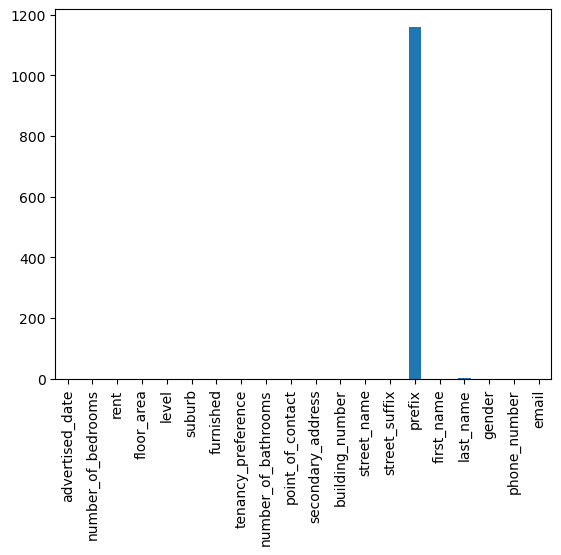

In [23]:
training_df.isnull().sum().plot(kind = 'bar')
plt.show()

In [24]:
#prefix has some missing values

In [25]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      3434 non-null   object 
 1   number_of_bedrooms   3434 non-null   int64  
 2   rent                 3434 non-null   float64
 3   floor_area           3434 non-null   int64  
 4   level                3434 non-null   object 
 5   suburb               3434 non-null   object 
 6   furnished            3434 non-null   object 
 7   tenancy_preference   3434 non-null   object 
 8   number_of_bathrooms  3434 non-null   int64  
 9   point_of_contact     3434 non-null   object 
 10  secondary_address    3434 non-null   object 
 11  building_number      3434 non-null   int64  
 12  street_name          3434 non-null   object 
 13  street_suffix        3434 non-null   object 
 14  prefix               2274 non-null   object 
 15  first_name           3434 non-null   o

In [26]:
#one mssing value in column-> "last_name". Which, as per the business , the column last_name is not imprtant. 
#we will later drop the entire column along with not so required columns.

In [27]:
#lets explore column advertised date, and also change the dtype to date-time.

In [28]:
training_df['advertised_date']

0       2022-05-18
1       2022-05-13
2       2022-05-16
3       2022-05-09
4       2022-04-29
           ...    
3429    2022-06-08
3430    2022-06-02
3431    2022-05-18
3432    2022-05-15
3433    2022-05-04
Name: advertised_date, Length: 3434, dtype: object

In [29]:
training_df['advertised_date'] = pd.to_datetime(training_df['advertised_date'])

In [30]:
#extracting year, month , day into separate columns for better data visualisations,  
#improving model features and analyse trends over time.

In [31]:
training_df['yearmonth'] = training_df['advertised_date'].dt.to_period('M')

In [32]:
training_df['advertised_year'] = training_df['advertised_date'].dt.year
training_df['advertised_month'] = training_df['advertised_date'].dt.month
training_df['advertised_day'] = training_df['advertised_date'].dt.day

In [33]:
#using regular expression to clean up phone number column
# cleaning special characters eg: '+*' '\ /'

In [34]:
training_df['phone_number'] = training_df['phone_number'].apply(lambda x: re.sub('\D', ' ', x))


In [35]:
#adjusting abnormal gaps between phone numbers.
#also replacing starting 61 with 0

In [36]:
training_df['phone_number'] = training_df['phone_number'].replace(" ", "", regex=True)
training_df['phone_number'] = training_df['phone_number'].replace("61", "0", regex=True)

In [37]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   advertised_date      3434 non-null   datetime64[ns]
 1   number_of_bedrooms   3434 non-null   int64         
 2   rent                 3434 non-null   float64       
 3   floor_area           3434 non-null   int64         
 4   level                3434 non-null   object        
 5   suburb               3434 non-null   object        
 6   furnished            3434 non-null   object        
 7   tenancy_preference   3434 non-null   object        
 8   number_of_bathrooms  3434 non-null   int64         
 9   point_of_contact     3434 non-null   object        
 10  secondary_address    3434 non-null   object        
 11  building_number      3434 non-null   int64         
 12  street_name          3434 non-null   object        
 13  street_suffix        3434 non-nul

In [38]:
# lETS look at column "level"

In [39]:
training_df['level']

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4       Ground out of 1
             ...       
3429         4 out of 5
3430         2 out of 2
3431         3 out of 5
3432         1 out of 4
3433         4 out of 5
Name: level, Length: 3434, dtype: object

In [40]:
# we have to transform this column into two separate columns 
#1st --> current level
#2nd --> total_level

In [41]:
training_df['level'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '7 out of 8',
       '2 out of 4', '4 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '2 out of 8', '5 out of 12', '3 out of 7',
       '7 out of 19', '14 out of 23', 'Upper Basement out of 9',
       '3 out of 21', '1 out of 22', '8 out of 8', '6 out of 12',
       'Upper Basement out of 16', '60 out of 66', '5 out of 8',
       '5 out of 7', '12 out of 18', '26 out of 44', '1 out of 8',
       '53 out of 78', 'Ground out of 7', '13 out of 20', '10 out of 18',
      

In [42]:
#treating all the lower upper and ground levels into separate column 'current level'.

In [43]:
training_df['current_level'] = training_df['level'].apply(lambda x : -1 if 'Lower Basement' in x else
                                                          -0.5 if  'Upper Basement' in x else
                                                          0 if 'Ground' in x else
                                                          int(x.split(' ')[0]))
                                                    
                                                          
                                                        

In [44]:
#now since there is a pattern "out of" in describing the total number of leveles.
#we extract  it using regex (regular expression)

In [45]:
training_df['total_level'] = training_df['level'].str.extract(r'out of (\d+)')

In [46]:
#converting total_level into float
training_df['total_level'] = training_df['total_level'].astype(float)

In [47]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   advertised_date      3434 non-null   datetime64[ns]
 1   number_of_bedrooms   3434 non-null   int64         
 2   rent                 3434 non-null   float64       
 3   floor_area           3434 non-null   int64         
 4   level                3434 non-null   object        
 5   suburb               3434 non-null   object        
 6   furnished            3434 non-null   object        
 7   tenancy_preference   3434 non-null   object        
 8   number_of_bathrooms  3434 non-null   int64         
 9   point_of_contact     3434 non-null   object        
 10  secondary_address    3434 non-null   object        
 11  building_number      3434 non-null   int64         
 12  street_name          3434 non-null   object        
 13  street_suffix        3434 non-nul

In [48]:
# after separting level columns we discover few missing values in total_level.
#LETS LOOK ITNO THAT 

In [49]:
training_df[training_df['total_level'].isnull()]

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,last_name,gender,phone_number,email,yearmonth,advertised_year,advertised_month,advertised_day,current_level,total_level
1868,2022-06-18,2,581.0,400,3,Adelaide,Unfurnished,Bachelors/Family,1,Contact Owner,...,Phillips,m,69131429,cristianbrowning@example.com,2022-06,2022,6,18,3.0,NaN
2127,2022-05-23,1,578.0,450,Ground,Adelaide,Furnished,Bachelors/Family,1,Contact Owner,...,Huang,f,079010546,xbarrett@example.net,2022-05,2022,5,23,0.0,NaN
3265,2022-06-12,3,574.0,900,1,Perth,Semi-Furnished,Bachelors/Family,3,Contact Owner,...,Diaz,u,0349246026,juan33@example.com,2022-06,2022,6,12,1.0,NaN
3320,2022-05-31,3,574.0,1270,1,Perth,Furnished,Family,2,Contact Owner,...,Moore,m,0316258209,smiller@example.org,2022-05,2022,5,31,1.0,NaN


In [50]:
#It is because not all of the level were in "out of " format. we will replace it with values of level.

In [51]:
training_df['total_level'].fillna(training_df['level'],inplace = True)

In [52]:
training_df['total_level'].replace({'Ground' : '0'},inplace = True)

In [53]:
training_df

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,last_name,gender,phone_number,email,yearmonth,advertised_year,advertised_month,advertised_day,current_level,total_level
0,2022-05-18,2,568.0,1100,Ground out of 2,Canberra,Unfurnished,Bachelors/Family,2,Contact Owner,...,Jones,m,0881745701,georgelopez@example.org,2022-05,2022,5,18,0.0,2.0
1,2022-05-13,2,581.0,800,1 out of 3,Canberra,Semi-Furnished,Bachelors/Family,1,Contact Owner,...,Mcknight,f,0855537944,robertdorsey@example.net,2022-05,2022,5,13,1.0,3.0
2,2022-05-16,2,577.0,1000,1 out of 3,Canberra,Semi-Furnished,Bachelors/Family,1,Contact Owner,...,Lester,u,0363943934,rodriguezkaren@example.net,2022-05,2022,5,16,1.0,3.0
3,2022-05-09,2,565.0,850,1 out of 2,Canberra,Unfurnished,Bachelors,1,Contact Owner,...,Hill,f,0836311377,johnsonjeremy@example.com,2022-05,2022,5,9,1.0,2.0
4,2022-04-29,2,564.0,600,Ground out of 1,Canberra,Unfurnished,Bachelors/Family,2,Contact Owner,...,Richardson,f,0409341340,sbrown@example.net,2022-04,2022,4,29,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,2022-06-08,3,600.0,1250,4 out of 5,Perth,Furnished,Bachelors,2,Contact Owner,...,Thabani,f,0263675421,shannonharvey@example.net,2022-06,2022,6,8,4.0,5.0
3430,2022-06-02,2,571.0,1350,2 out of 2,Perth,Unfurnished,Bachelors/Family,2,Contact Owner,...,Spencer,f,36906564,vincentheather@example.net,2022-06,2022,6,2,2.0,2.0
3431,2022-05-18,2,574.0,1000,3 out of 5,Perth,Semi-Furnished,Bachelors/Family,2,Contact Owner,...,Garner,m,0469517332,jessicahowell@example.net,2022-05,2022,5,18,3.0,5.0
3432,2022-05-15,3,592.0,2000,1 out of 4,Perth,Semi-Furnished,Bachelors/Family,3,Contact Owner,...,Silva,f,0485687657,gmiller@example.net,2022-05,2022,5,15,1.0,4.0


In [54]:
#checking the data distibtion

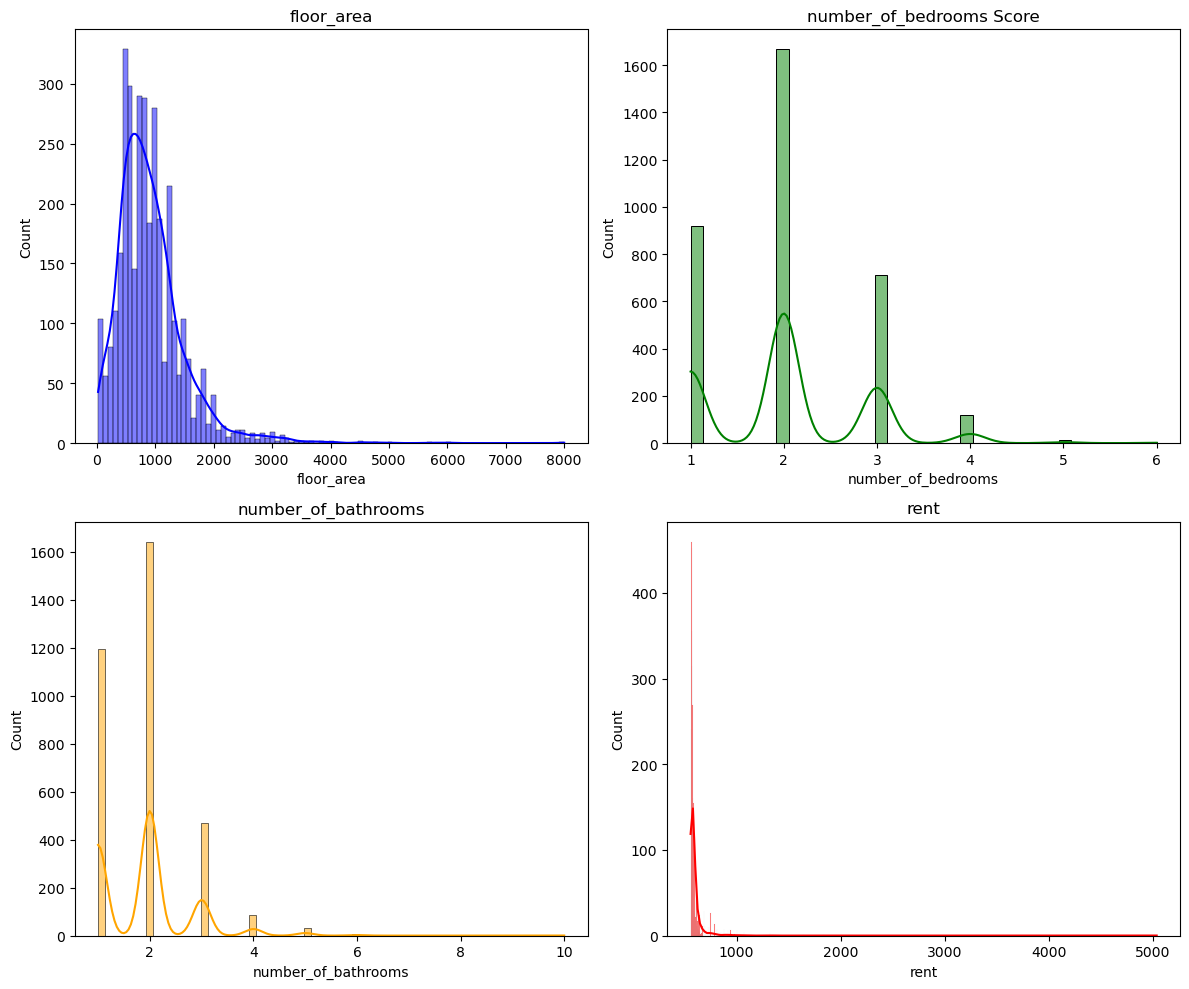

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the histograms for each of the specified columns
sns.histplot(training_df['floor_area'], ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('floor_area')

sns.histplot(training_df['number_of_bedrooms'], ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title('number_of_bedrooms Score')

sns.histplot(training_df['number_of_bathrooms'], ax=axes[1, 0], kde=True, color='orange')
axes[1, 0].set_title('number_of_bathrooms')

sns.histplot(training_df['rent'], ax=axes[1, 1], kde=True, color='red')
axes[1, 1].set_title('rent')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [56]:
#1)"floor area" seems to be skewed to its right, however some of the houses having close to 0 floor area doesn't seem real
#2)number of bedrooms, majority of them have standard number of bedrooms,
#3)number of bathroom again appears to have some large numbers which seem to be off
#4)most of the weekly rent seem to have mid 500 -700 dollarsweely , however some seem relatively high.

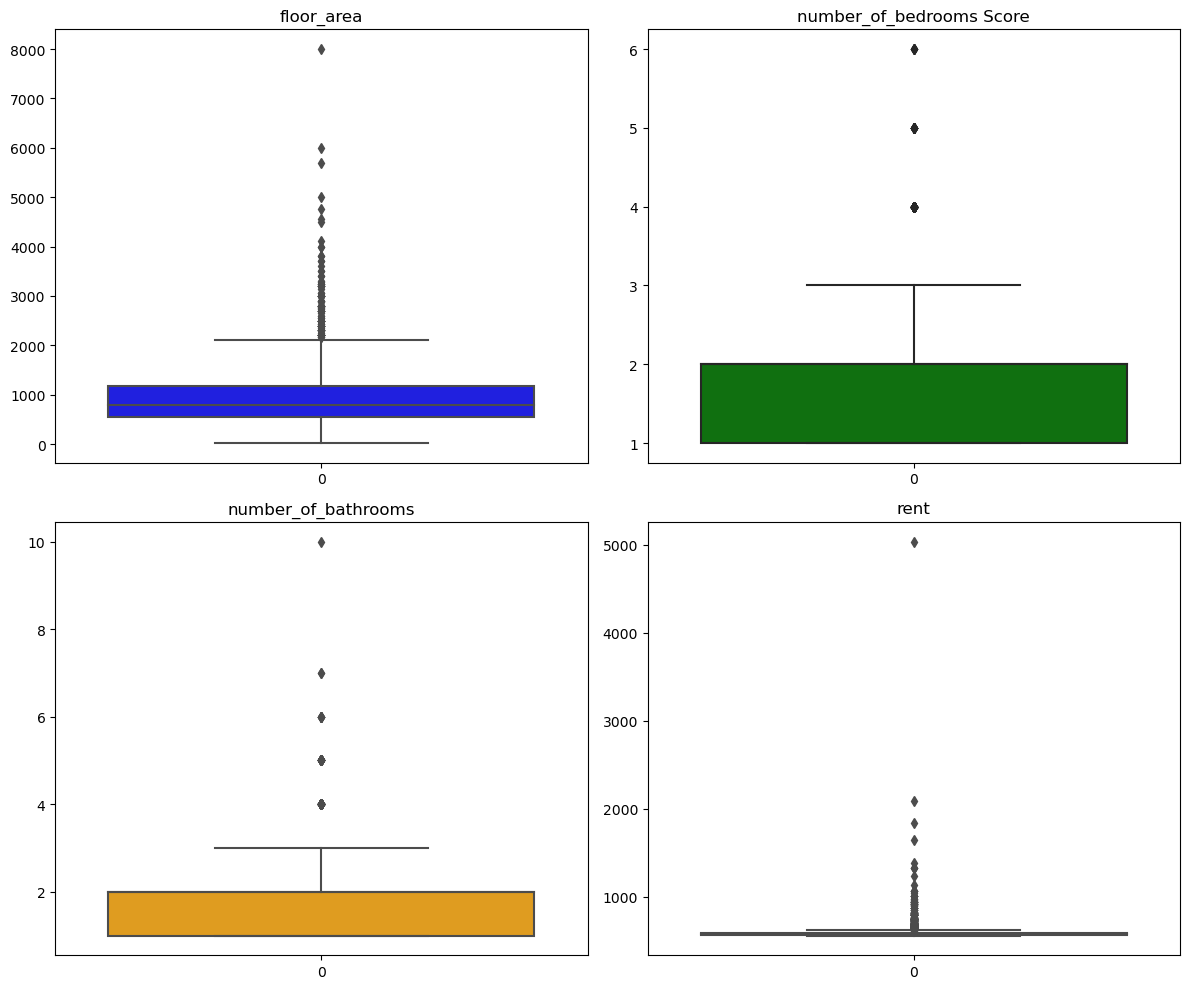

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the histograms for each of the specified columns
sns.boxplot(training_df['floor_area'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('floor_area')

sns.boxplot(training_df['number_of_bedrooms'], ax=axes[0, 1],  color='green')
axes[0, 1].set_title('number_of_bedrooms Score')

sns.boxplot(training_df['number_of_bathrooms'], ax=axes[1, 0],  color='orange')
axes[1, 0].set_title('number_of_bathrooms')

sns.boxplot(training_df['rent'], ax=axes[1, 1], color='red')
axes[1, 1].set_title('rent')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
#as we acknlowdged above there are some anomalies in the dataset, and therefore we will fix them.

In [59]:
#checking on the outliers of 'floor area' using IQR

In [60]:
Q1 = training_df['floor_area'].quantile(0.25)
Q3 = training_df['floor_area'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    

In [61]:
#SINCE WE HAVE 118 OUTLIERS AND REMOVING THEM SHOULD NOT CAUSE ANY PROBLEMS. WE DROP THEM

In [62]:
outliers = training_df[(training_df['floor_area'] < lower_bound) | (training_df['floor_area'] > upper_bound)]
outliers 


,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,last_name,gender,phone_number,email,yearmonth,advertised_year,advertised_month,advertised_day,current_level,total_level
151,2022-05-13,1,619.0,2200,2 out of 5,Canberra,Furnished,Bachelors/Family,3,Contact Owner,...,Watkins,u,025058096,burgesscolin@example.net,2022-05,2022,5,13,2.0,5.0
225,2022-06-24,1,563.0,2160,1 out of 2,Canberra,Semi-Furnished,Bachelors,1,Contact Owner,...,Sutton,m,0484251748,smithcourtney@example.com,2022-06,2022,6,24,1.0,2.0
319,2022-06-08,3,606.0,3500,1 out of 2,Canberra,Semi-Furnished,Bachelors/Family,2,Contact Owner,...,Garde,u,0419505956,christopher30@example.org,2022-06,2022,6,8,1.0,2.0
431,2022-06-05,3,638.0,2210,Ground out of 2,Canberra,Unfurnished,Bachelors/Family,3,Contact Owner,...,Wilson,u,0341251215,lewispatricia@example.org,2022-06,2022,6,5,0.0,2.0
480,2022-05-14,4,1003.0,3000,39 out of 60,Sydney,Semi-Furnished,Bachelors/Family,5,Contact Agent,...,Zavala,f,0280477824,tinamoreno@example.com,2022-05,2022,5,14,39.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,2022-06-17,3,615.0,2400,1 out of 3,Perth,Furnished,Bachelors/Family,3,Contact Agent,...,Schmidt,f,0292513578,iklein@example.org,2022-06,2022,6,17,1.0,3.0
3368,2022-06-20,4,613.0,2300,4 out of 5,Perth,Semi-Furnished,Bachelors/Family,4,Contact Owner,...,Willis,m,0746953294,hcain@example.com,2022-06,2022,6,20,4.0,5.0
3389,2022-06-18,3,632.0,2170,4 out of 5,Perth,Semi-Furnished,Bachelors/Family,3,Contact Owner,...,Simpson,u,040677258,leonjohnny@example.org,2022-06,2022,6,18,4.0,5.0
3412,2022-06-17,3,600.0,2500,2 out of 2,Perth,Unfurnished,Bachelors/Family,2,Contact Owner,...,May,m,42958405,charlesvargas@example.com,2022-06,2022,6,17,2.0,2.0


In [63]:
#storing evertything but outliers in new df
training_cleaned = training_df[(training_df['floor_area'] > lower_bound) & (training_df['floor_area'] < upper_bound)]

# RENTAL ANALYSIS BY SUBURBS

In [64]:
#Lets store each suburbs and perform exploration on if still some extreme rental values can be detected.

In [65]:
adelaide  = training_cleaned[training_cleaned['suburb'] == 'Adelaide']
sydney = training_cleaned[training_cleaned['suburb'] == 'Sydney']
melbn = training_cleaned[training_cleaned['suburb'] == 'Melbourne']
perth = training_cleaned[training_cleaned['suburb'] == 'Perth']
brisbn = training_cleaned[training_cleaned['suburb'] == 'Brisbane']
canb = training_cleaned[training_cleaned['suburb'] == 'Canberra']


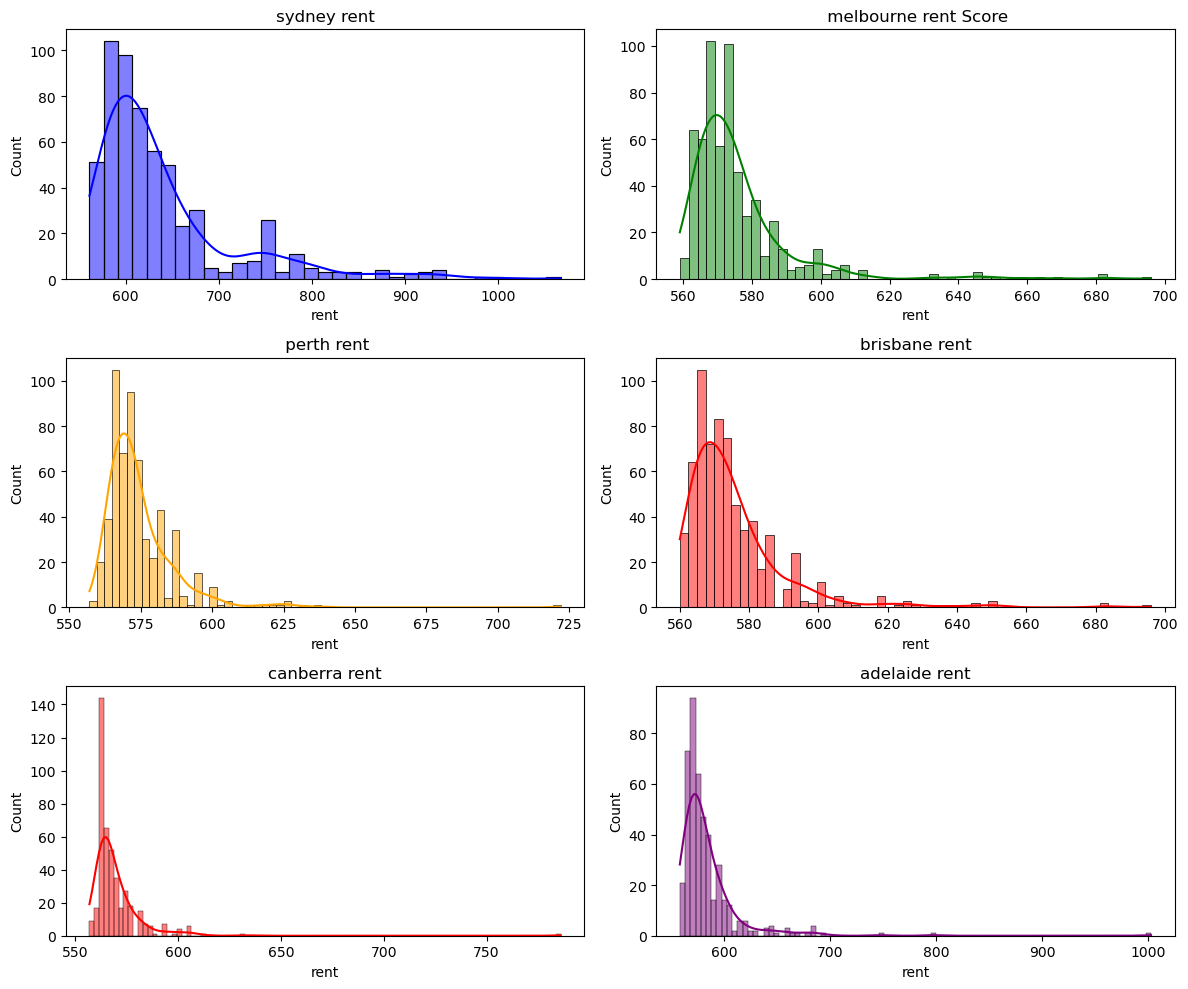

In [66]:
#distribution of rental prices by suburbs
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Plot the histograms for each of the specified columns
sns.histplot(sydney['rent'], ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('sydney rent')

sns.histplot(melbn['rent'], ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title(' melbourne rent Score')

sns.histplot(perth['rent'], ax=axes[1, 0], kde=True, color='orange')
axes[1, 0].set_title(' perth rent')

sns.histplot(brisbn['rent'], ax=axes[1, 1], kde=True, color='red')
axes[1, 1].set_title('brisbane rent')

sns.histplot(canb['rent'], ax=axes[2, 0], kde=True, color='red')
axes[2, 0].set_title('canberra rent')

sns.histplot(adelaide['rent'], ax = axes[2,1], kde = True, color = 'purple')
axes[2,1].set_title('adelaide rent')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [67]:
# we can observe, all of them are heavily right skewed, some are more than others:
#brisbane has extremities where rent is close to 5000 dollars a week.
#sydney has more than 2000 dollars a week
#adelaide has 1200 dollar a week

# BRISBANE

In [68]:
brisbn[brisbn['rent'] > 650] 

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,last_name,gender,phone_number,email,yearmonth,advertised_year,advertised_month,advertised_day,current_level,total_level
1370,2022-05-12,3,651.0,1850,6 out of 11,Brisbane,Semi-Furnished,Bachelors,3,Contact Agent,...,Kennedy,m,040477360,tiffanythomas@example.com,2022-05,2022,5,12,6.0,11.0
1527,2022-05-27,3,683.0,1800,2 out of 4,Brisbane,Semi-Furnished,Bachelors/Family,3,Contact Agent,...,Moore,f,0328283216,petersonjill@example.com,2022-05,2022,5,27,2.0,4.0
1560,2022-05-23,4,651.0,2000,Ground out of 2,Brisbane,Furnished,Bachelors/Family,3,Contact Owner,...,Taylor,m,0365562111,christopher77@example.com,2022-05,2022,5,23,0.0,2.0
1598,2022-06-10,3,651.0,2000,1 out of 5,Brisbane,Furnished,Bachelors,2,Contact Agent,...,Keller,f,0427801944,awilson@example.net,2022-06,2022,6,10,1.0,5.0
1616,2022-06-12,3,696.0,1500,6 out of 16,Brisbane,Furnished,Bachelors/Family,3,Contact Agent,...,Lewis,u,0267385764,dalekennedy@example.net,2022-06,2022,6,12,6.0,16.0
1646,2022-06-02,3,683.0,1950,3 out of 3,Brisbane,Semi-Furnished,Bachelors/Family,3,Contact Agent,...,Brown,f,0353491570,michael64@example.org,2022-06,2022,6,2,3.0,3.0


In [69]:
#WE FIND EVERYTHING TO BE NORMAL IN THE SPREAD SO WE LEAVE IT AS IS

# CANBERRA

In [70]:
#understanding variation in canberra rent is logical or just something odd
canb_outlier = canb[canb['rent'] > 650].index
canb_outlier

Index([90], dtype='int64')

In [71]:
#since this is an extreme value we change it with the mean of canberra in the "training_cleaned"

In [72]:
training_cleaned.loc[canb_outlier, 'rent'] = canb['rent'].mean()

In [73]:
#changing the training_cleaned values too.

# Melbourne

In [74]:
melbn[melbn['rent'] > 650]

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,last_name,gender,phone_number,email,yearmonth,advertised_year,advertised_month,advertised_day,current_level,total_level
2362,2022-05-27,3,658.0,2036,6 out of 11,Melbourne,Semi-Furnished,Bachelors,3,Contact Agent,...,Turner,m,0282006211,leahcharles@example.org,2022-05,2022,5,27,6.0,11.0
2388,2022-06-22,3,664.0,1725,10 out of 14,Melbourne,Furnished,Bachelors/Family,2,Contact Agent,...,Terry,f,0329231977,payneanthony@example.org,2022-06,2022,6,22,10.0,14.0
2520,2022-06-17,3,670.0,2100,2 out of 4,Melbourne,Unfurnished,Bachelors,3,Contact Agent,...,Ellis,u,0466301168,williamssherri@example.com,2022-06,2022,6,17,2.0,4.0
2564,2022-06-08,3,683.0,1975,12 out of 18,Melbourne,Semi-Furnished,Family,3,Contact Agent,...,Baker,m,32245886,tcastro@example.org,2022-06,2022,6,8,12.0,18.0
2573,2022-05-20,3,696.0,1435,5 out of 15,Melbourne,Furnished,Bachelors/Family,3,Contact Owner,...,Harris,u,0738053811,amyrice@example.net,2022-05,2022,5,20,5.0,15.0
2795,2022-05-27,3,683.0,2000,3 out of 14,Melbourne,Semi-Furnished,Bachelors,3,Contact Agent,...,Moreno,m,7935017,ischneider@example.org,2022-05,2022,5,27,3.0,14.0
2833,2022-06-14,3,651.0,2000,3 out of 4,Melbourne,Semi-Furnished,Bachelors/Family,3,Contact Owner,...,Ryan,u,0855717350,gerald20@example.net,2022-06,2022,6,14,3.0,4.0


In [75]:
##WE FIND EVERYTHING TO BE NORMAL IN THE SPREAD SO WE LEAVE IT AS IS

# ADELAIDE

In [76]:
 adelaide[adelaide['rent'] > 750]

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,last_name,gender,phone_number,email,yearmonth,advertised_year,advertised_month,advertised_day,current_level,total_level
1755,2022-06-20,4,1003.0,800,1 out of 4,Adelaide,Unfurnished,Bachelors/Family,4,Contact Agent,...,Cortez,u,0803577431,james79@example.com,2022-06,2022,6,20,1.0,4.0
1954,2022-05-22,5,798.0,200,2 out of 2,Adelaide,Unfurnished,Bachelors,5,Contact Agent,...,Jimenez,u,0283813014,ythompson@example.net,2022-05,2022,5,22,2.0,2.0


In [77]:
ade_outier =  adelaide[adelaide['rent'] > 750].index
training_cleaned.loc[ade_outier, 'rent'] = adelaide['rent'].mean()

In [78]:
#we change these two extreme values to mean

# PERTH

In [79]:
perth[perth['rent']> 650]

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,last_name,gender,phone_number,email,yearmonth,advertised_year,advertised_month,advertised_day,current_level,total_level
2930,2022-05-06,2,722.0,130,1 out of 1,Perth,Unfurnished,Bachelors/Family,2,Contact Owner,...,Drake,f,0245334978,eric90@example.org,2022-05,2022,5,6,1.0,1.0


In [80]:
#PERTH IS FINE

# SYDNEY

In [81]:
sydney[sydney['rent'] > 950] 

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,last_name,gender,phone_number,email,yearmonth,advertised_year,advertised_month,advertised_day,current_level,total_level
757,2022-05-19,3,1067.0,1800,7 out of 14,Sydney,Semi-Furnished,Bachelors,4,Contact Agent,...,Thompson,m,0787124204,zerickson@example.com,2022-05,2022,5,19,7.0,14.0
908,2022-06-15,3,978.0,1500,20 out of 41,Sydney,Semi-Furnished,Bachelors/Family,2,Contact Agent,...,Doyle,f,0456368495,robertssusan@example.net,2022-06,2022,6,15,20.0,41.0
995,2022-06-08,3,1003.0,1663,19 out of 85,Sydney,Semi-Furnished,Bachelors/Family,2,Contact Agent,...,Baker,f,0824473521,douglasmarquez@example.org,2022-06,2022,6,8,19.0,85.0


In [82]:
#considering sydney hosuing market is swelled up we let these values live in the dataframe.

In [83]:
#So far everything related to "floor area" and "rent" is reconciled and stored in "training_cleaned"

# GENDER affect on rental prices

In [84]:
#lets check the gender column

In [85]:
training_cleaned['gender'].value_counts()

gender
u    1119
f    1106
m    1091
Name: count, dtype: int64

In [86]:
#we have too many unknown columns.
# Question to ask:
#1) Does the gender affect the rental prices.
# Hypothesis: Gender does not have an affect on rental prices.

In [87]:
#running a statistical tests  
#Checking if DATA of rental_price in each gender group is normally distributed.

In [88]:
from scipy.stats import shapiro
for gender in training_cleaned['gender'].unique():
    rents = training_cleaned[training_cleaned['gender'] == gender]['rent']
shapiro_stat , shapiro_p_value =  shapiro(rents)   
if shapiro_p_value > 0.05:
    print("ANOVA")
else:
    print("Kruskal-Wallis")

Kruskal-Wallis


In [89]:
#creating boolean series to make each groups "male", "female", "unknown"

In [90]:
male_rent =training_cleaned[training_cleaned['gender'] == 'm']['rent']
female_rent = training_cleaned[training_cleaned['gender'] == 'f']['rent']
unknown_rent = training_cleaned[training_cleaned['gender'] == 'u']['rent']

In [91]:
from scipy.stats import kruskal

In [92]:
kruskal_stat , kruskal_p_value = kruskal(male_rent, female_rent, unknown_rent)
#interpretation
if kruskal_p_value <= 0.05:
    print("There is a significant difference , reject hypothesis.")
else:
    print("There is no significant difference, failed to reject hypothesis.")
    

There is no significant difference, failed to reject hypothesis.


# CONCLUSION: GENDER DO NOT AFFECT THE RENTAL PRICES

In [93]:
#visualising rental prices by suburbs

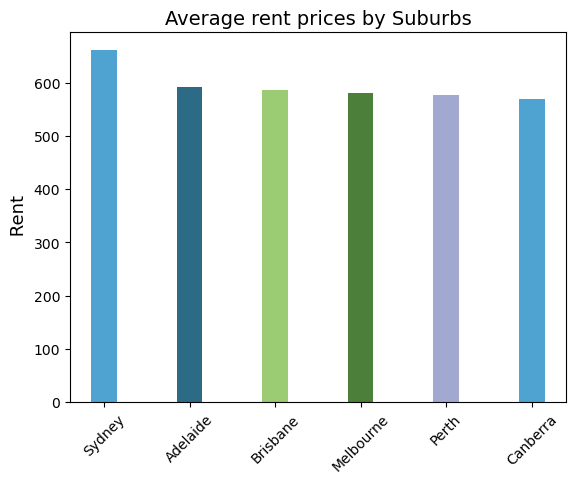

In [94]:
training_df.groupby('suburb')['rent'].mean().sort_values(ascending = False).plot(kind = 'bar', width = 0.3,
                                        color =['#4FA3D1', '#2D6A85', '#9BCB72', '#4B7F3A', '#A2A9D0'])
plt.title('Average rent prices by Suburbs', fontsize =14)
plt.xlabel(" ")
plt.ylabel(" Rent", fontsize = 13)
plt.xticks(rotation =45)
plt.show()

# rental by suburb illustration

In [95]:
#sydney has the highest average rental price.

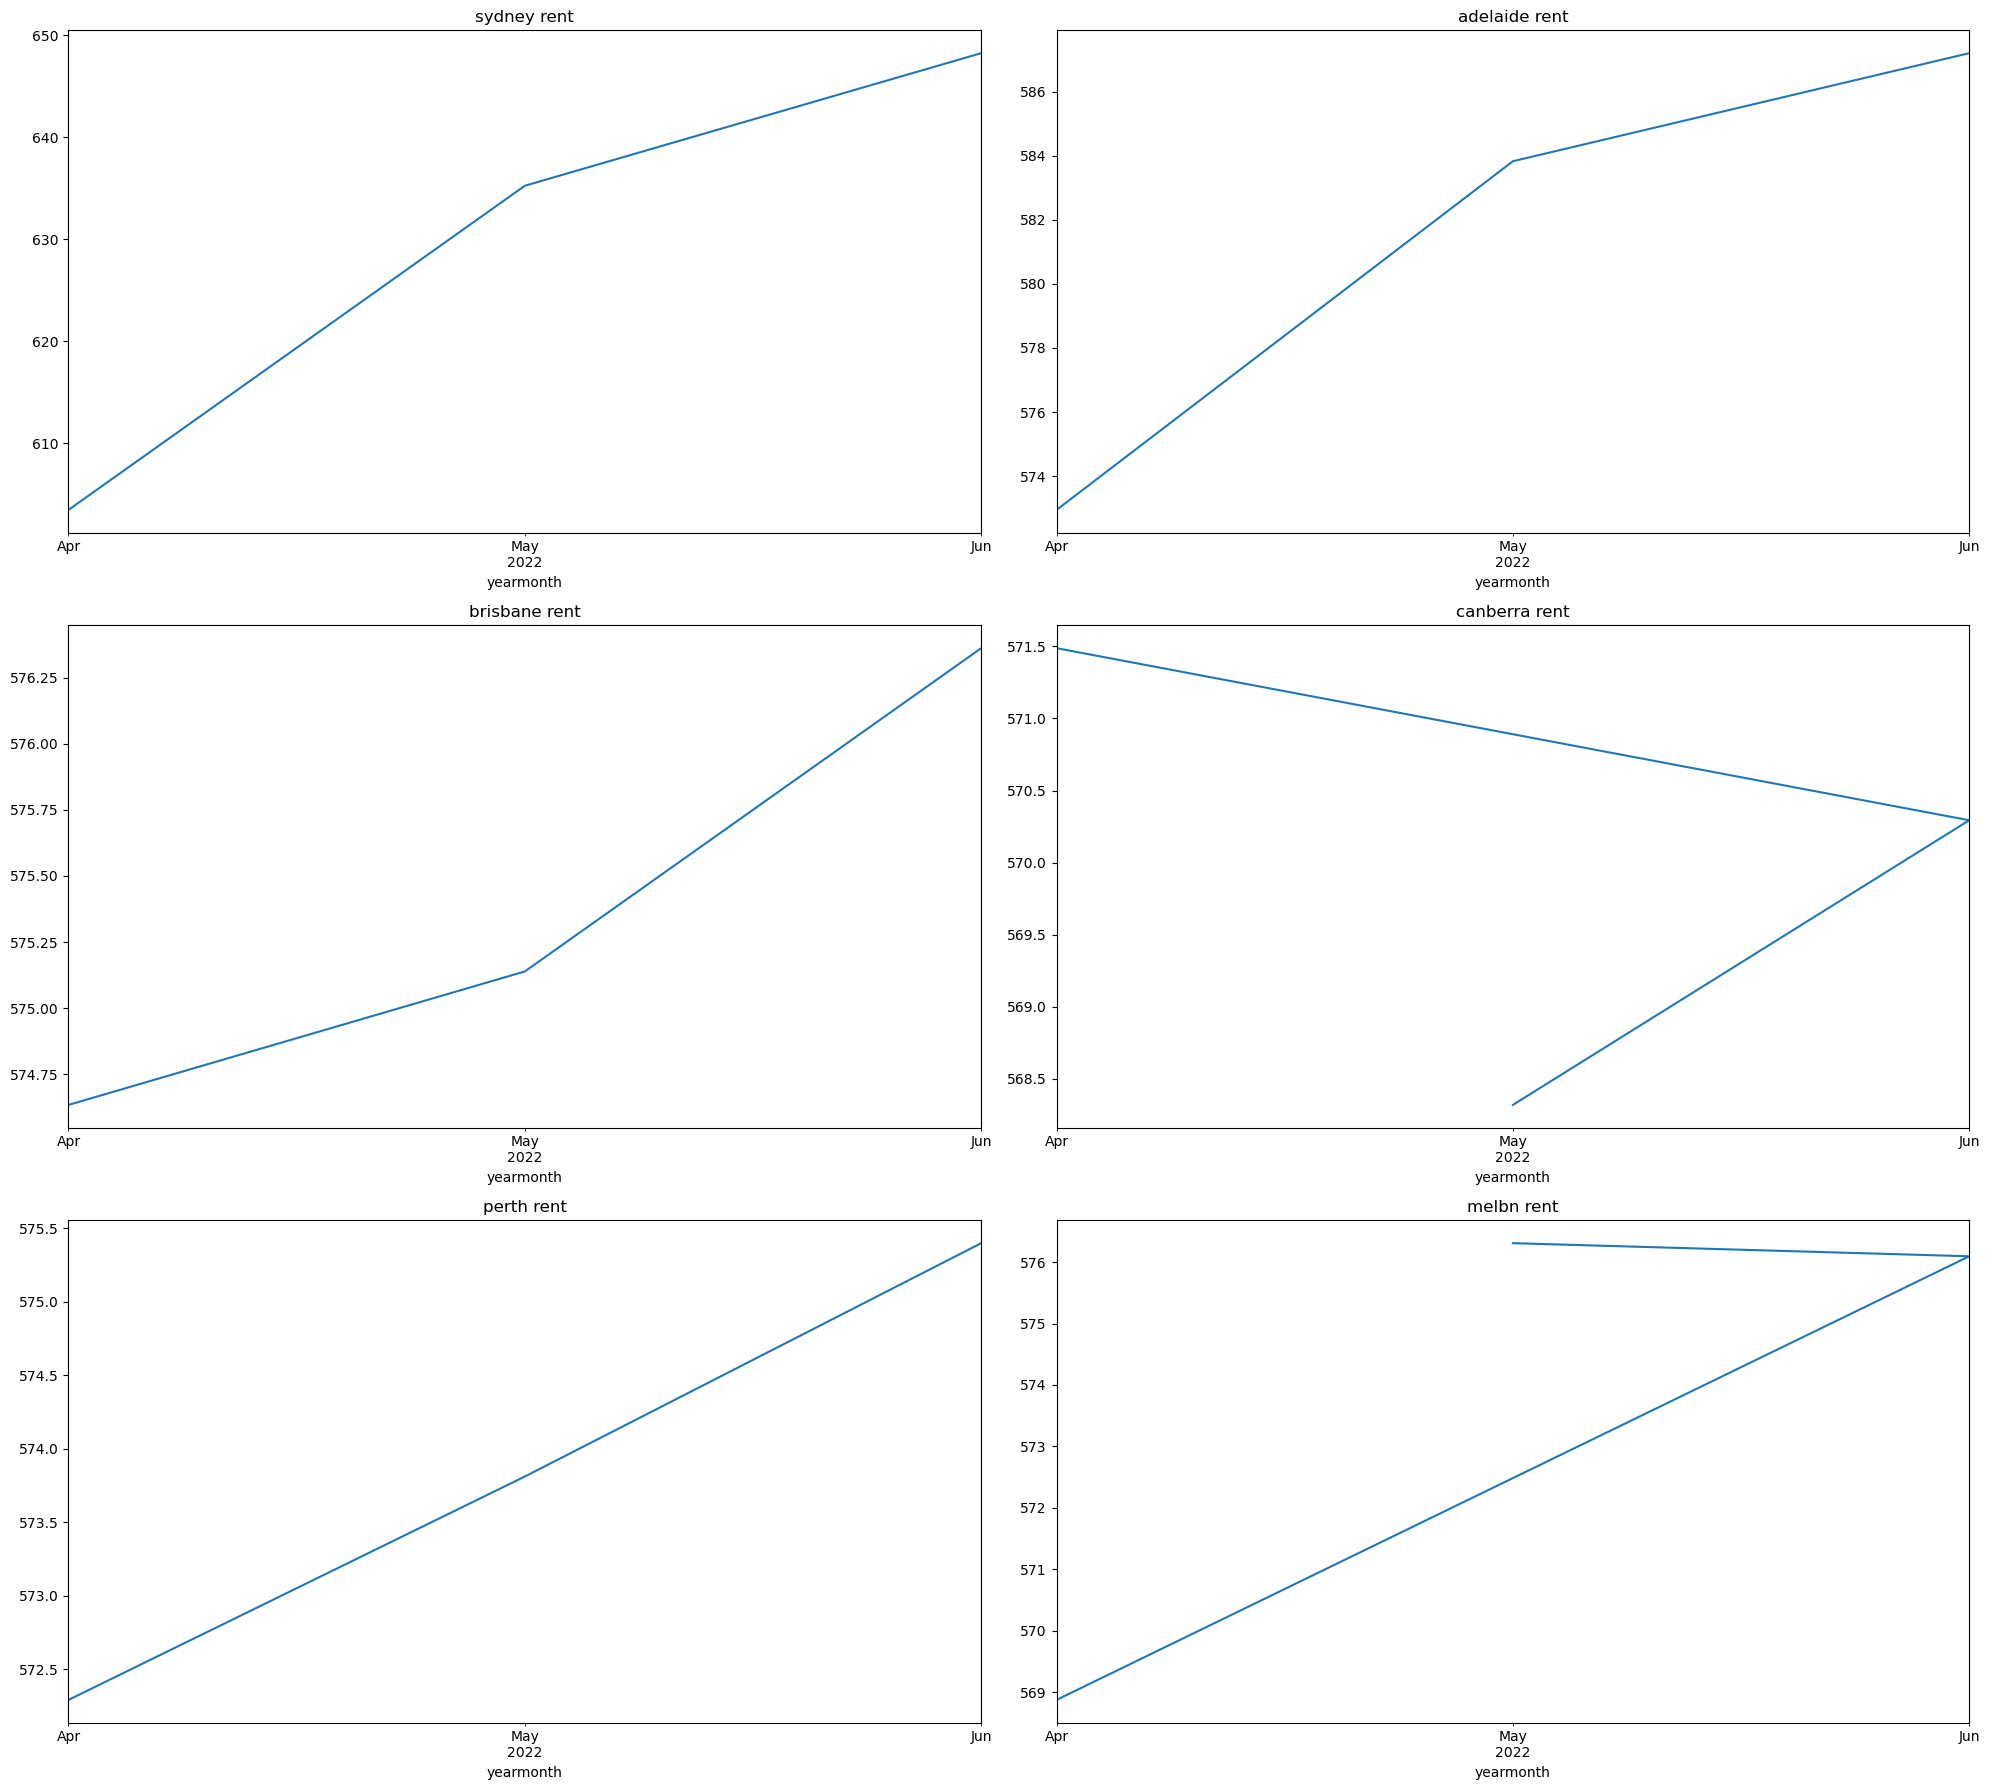

In [96]:
fig ,axes = plt.subplots(3,2, figsize = (20 , 18))
sydney.groupby('yearmonth')['rent'].mean().sort_values(ascending =True).plot(kind = 'line',ax =axes[0,0])
axes[0,0].set_title('sydney rent')

adelaide.groupby('yearmonth')['rent'].mean().sort_values(ascending =True).plot(kind = 'line',ax =axes[0,1])
axes[0,1].set_title('adelaide rent')

brisbn.groupby('yearmonth')['rent'].mean().sort_values(ascending =True).plot(kind = 'line',ax =axes[1,0])
axes[1,0].set_title('brisbane rent')

canb.groupby('yearmonth')['rent'].mean().sort_values(ascending =True).plot(kind = 'line',ax =axes[1,1])
axes[1,1].set_title('canberra rent')

perth.groupby('yearmonth')['rent'].mean().sort_values(ascending =True).plot(kind = 'line',ax =axes[2,0])
axes[2,0].set_title('perth rent')

melbn.groupby('yearmonth')['rent'].mean().sort_values(ascending =True).plot(kind = 'line',ax =axes[2,1])
axes[2,1].set_title('melbn rent')

plt.tight_layout()

plt.show()


In [97]:
#top 5 house bed bath in sydney in dataset

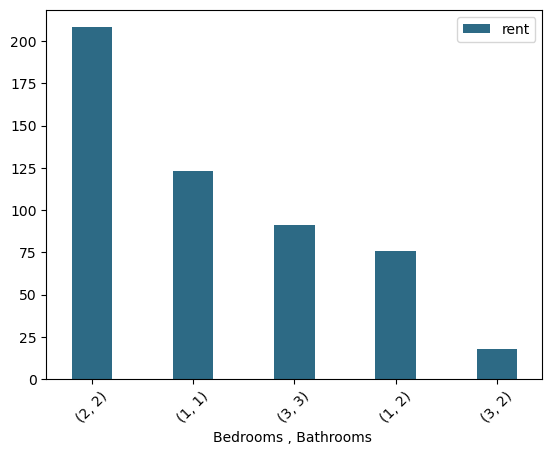

In [98]:
bed_bath =sydney.groupby(['number_of_bedrooms','number_of_bathrooms' ])['rent'].size().sort_values(
    ascending = False).head(5).reset_index()
bed_bath.set_index(['number_of_bedrooms', 'number_of_bathrooms']).plot(kind = 'bar', width = 0.4, 
                                             color = '#2D6A85') 
plt.xticks(rotation = 45)
plt.xlabel("Bedrooms , Bathrooms ")
plt.show()

# average house prices by bedroom and bathroom 

# SYDNEY

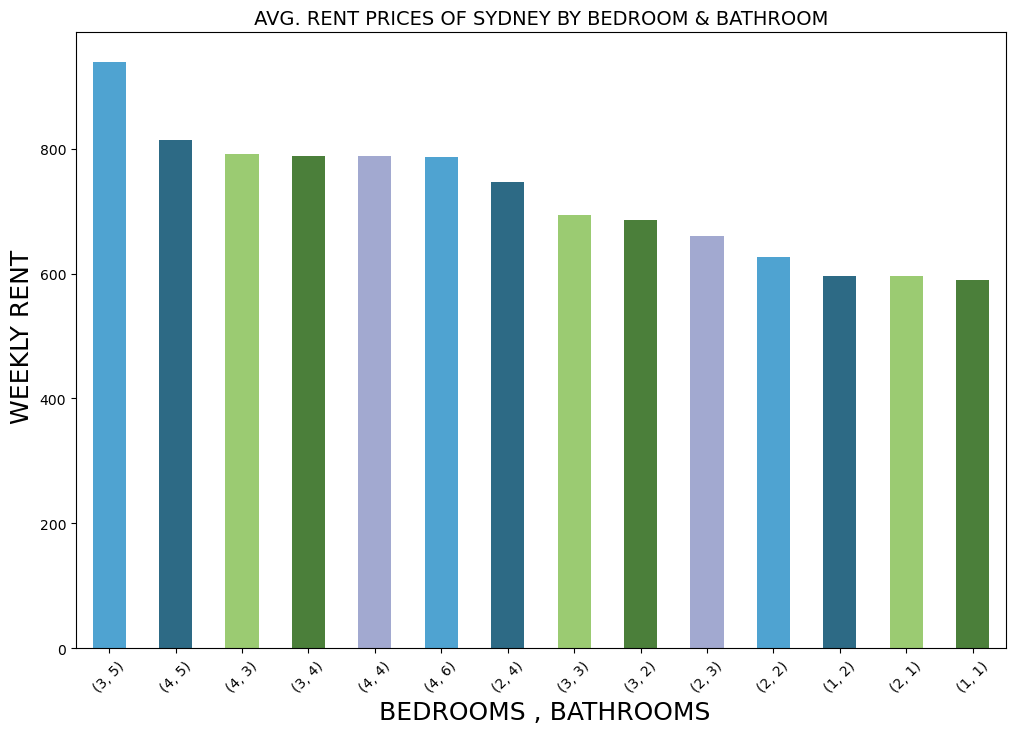

In [99]:
plt.figure(figsize = (12,8))
sydney.groupby(['number_of_bedrooms', 'number_of_bathrooms'])['rent'].mean().sort_values(ascending =False).plot(
    kind = 'bar', color =['#4FA3D1', '#2D6A85', '#9BCB72', '#4B7F3A', '#A2A9D0'] )
plt.xticks(rotation = 45)
plt.title(" AVG. RENT PRICES OF SYDNEY BY BEDROOM & BATHROOM ", fontsize =14)
plt.xlabel(" BEDROOMS , BATHROOMS", fontsize =18)
plt.ylabel(' WEEKLY RENT', fontsize =18)
plt.show()

                                                                  

# MELBOURNE

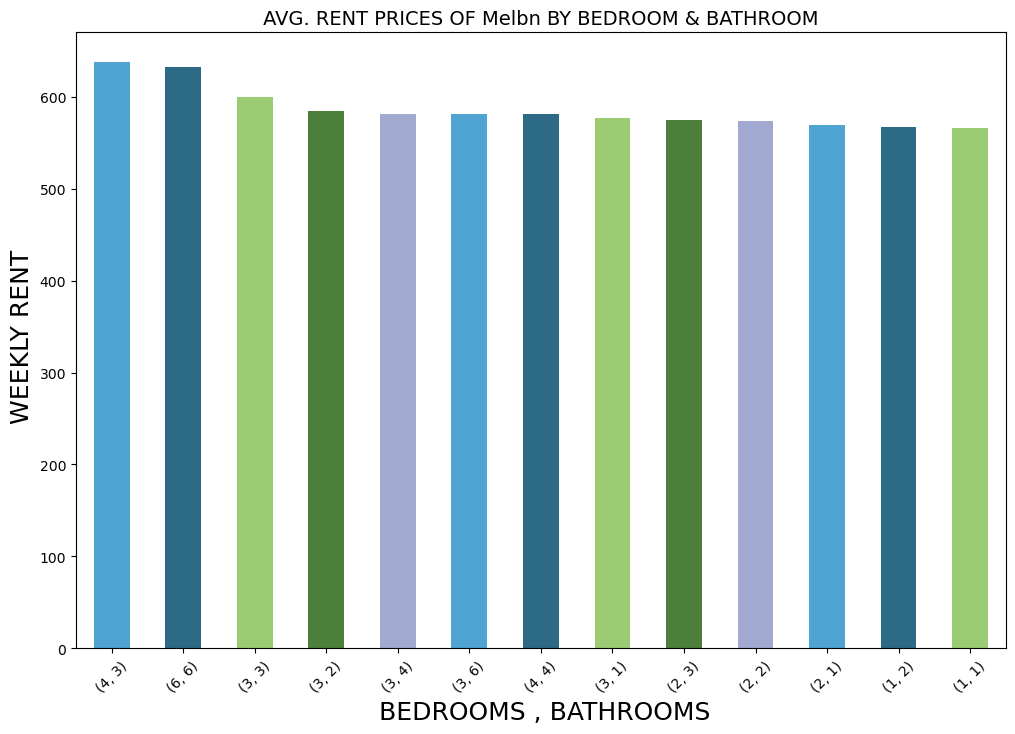

In [100]:
plt.figure(figsize = (12,8))
melbn.groupby(['number_of_bedrooms', 'number_of_bathrooms'])['rent'].mean().sort_values(ascending =False).plot(
    kind = 'bar', color =['#4FA3D1', '#2D6A85', '#9BCB72', '#4B7F3A', '#A2A9D0'] )
plt.xticks(rotation = 45)
plt.title(" AVG. RENT PRICES OF Melbn BY BEDROOM & BATHROOM ", fontsize =14)
plt.xlabel(" BEDROOMS , BATHROOMS", fontsize =18)
plt.ylabel(' WEEKLY RENT', fontsize =18)
plt.show()


# Adelaide

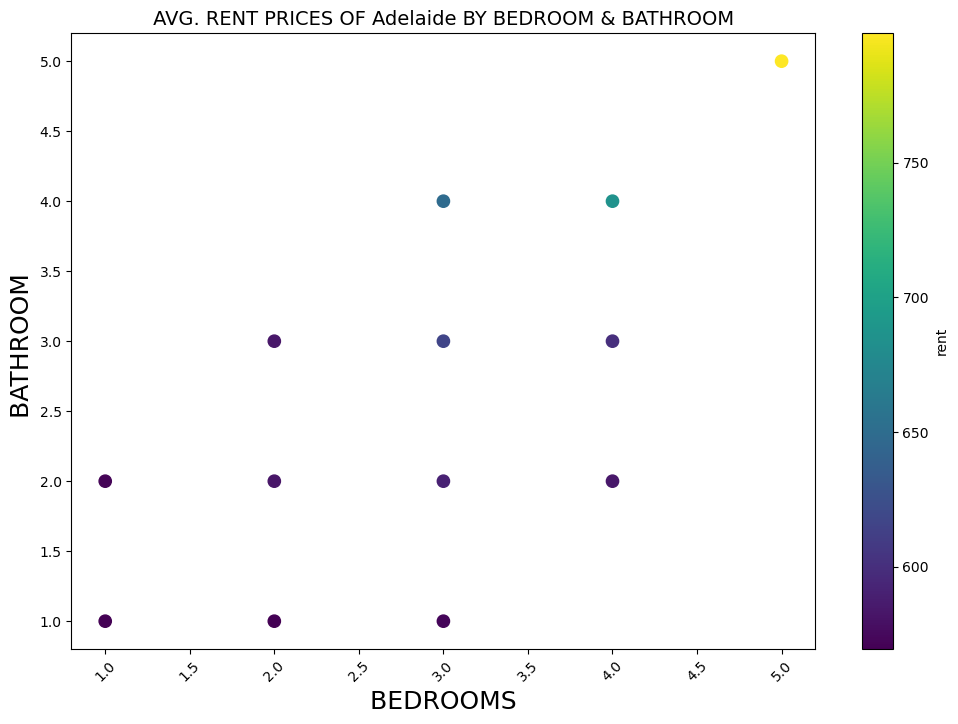

In [101]:

adelaide_bed_bath = adelaide.groupby(['number_of_bedrooms', 'number_of_bathrooms'])['rent'].mean().sort_values(ascending =False).reset_index()
adelaide_bed_bath.plot.scatter( x = 'number_of_bedrooms', y = 'number_of_bathrooms', c = 'rent',s = 78, figsize = (12,8) )
plt.xticks(rotation = 45)
plt.title(" AVG. RENT PRICES OF Adelaide BY BEDROOM & BATHROOM ", fontsize =14)
plt.xlabel(" BEDROOMS ", fontsize =18)
plt.ylabel('BATHROOM ',fontsize = 18)
plt.show()


In [102]:
#checking whether Rents by suburbs are statistically significant
# Null Hypothesis - Suburbs have no significant impact on rent prices.
#Alternative hypothesis - Suburbs have significant impact on rent prices.

In [103]:
from scipy.stats import kruskal

In [104]:
syndey_rent = training_cleaned[training_cleaned['suburb'] == 'Sydney']['rent']
perth_rent = training_cleaned[training_cleaned['suburb'] == 'Perth']['rent'] 
canberra_rent = training_cleaned[training_cleaned['suburb'] == 'Canberra']['rent']
melbourne_rent = training_cleaned[training_cleaned['suburb'] == 'Melbourne']['rent']
brisbane_rent = training_cleaned[training_cleaned['suburb'] == 'Brisbane']['rent']
adelaide_rent = training_cleaned[training_cleaned['suburb'] == 'Adelaide']['rent']

In [105]:
kk_stat , kk_p_value = kruskal (syndey_rent, perth_rent, canberra_rent, melbourne_rent, brisbane_rent, adelaide_rent )

In [106]:
if kk_p_value < 0.05:
    print('reject the null hypothesis')
else:
    print('Cannot Reject the null hopthesis')

reject the null hypothesis


# the above test conducted implies that suburbs have a significant impact on the rent prices.

In [107]:
#understanding the relationship of floor area vs rent

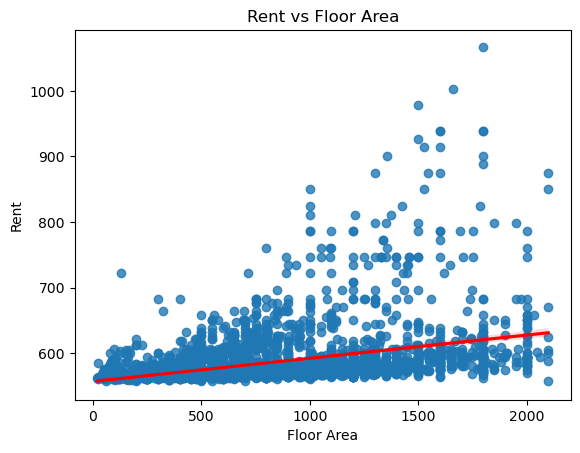

In [108]:
sns.regplot(data=training_cleaned, x='floor_area', y='rent' ,line_kws = {'color' :  'red'}  )
plt.title('Rent vs Floor Area')
plt.xlabel('Floor Area')
plt.ylabel('Rent')
plt.show()

In [109]:
#average rent by furnish ,semi-furnish, unfurnished

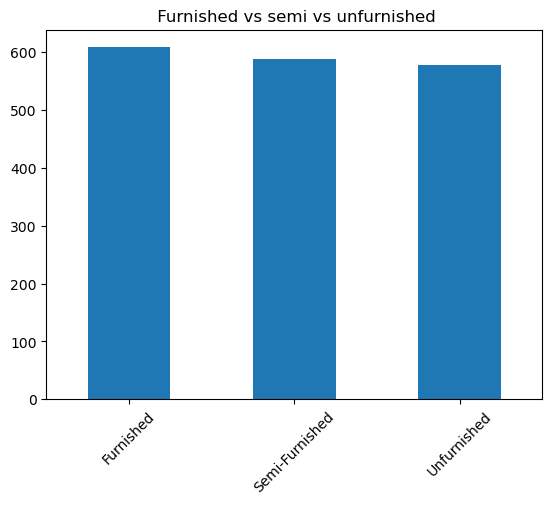

In [110]:
training_cleaned.groupby(['furnished'])['rent'].mean().plot(kind = 'bar')
plt.title(" Furnished vs semi vs unfurnished")
plt.xticks(rotation =45)
plt.xlabel(" ")
plt.show()

In [111]:
training_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3316 entries, 0 to 3433
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   advertised_date      3316 non-null   datetime64[ns]
 1   number_of_bedrooms   3316 non-null   int64         
 2   rent                 3316 non-null   float64       
 3   floor_area           3316 non-null   int64         
 4   level                3316 non-null   object        
 5   suburb               3316 non-null   object        
 6   furnished            3316 non-null   object        
 7   tenancy_preference   3316 non-null   object        
 8   number_of_bathrooms  3316 non-null   int64         
 9   point_of_contact     3316 non-null   object        
 10  secondary_address    3316 non-null   object        
 11  building_number      3316 non-null   int64         
 12  street_name          3316 non-null   object        
 13  street_suffix        3316 non-null   o

In [112]:
# <Student to fill this section>

In [113]:
# @title Training Set Insights

wgt_eda_training_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Training Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_training_set_insights

Textarea(value='', description='Training Set Insights:', layout=Layout(height='100%', width='auto'), placehold…

### C.3 Explore Validation Set

> You can add more cells in this section

In [114]:
# <Student to fill this section>

In [115]:
validation_df

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,secondary_address,building_number,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
0,2022-06-13,2,571.0,560,Ground out of 1,Melbourne,Semi-Furnished,Family,2,Contact Owner,Level 1,1,Baldwin Towers,Footway,NaN,Jay,Glover,u,(03)08687820,brettkennedy@example.net
1,2022-06-04,2,683.0,750,Upper Basement out of 30,Sydney,Unfurnished,Bachelors/Family,2,Contact Agent,1/,31,Cox Fire Track,Lookout,Dr.,Danielle,Tran,f,(03)-0313-6072,dana35@example.net
2,2022-04-29,3,574.0,950,Ground out of 3,Adelaide,Unfurnished,Bachelors/Family,2,Contact Owner,Unit 37,89,Davidson Ground,Part,NaN,Ashley,Pacheco,u,08-9358-6662,justin89@example.org
3,2022-05-18,1,565.0,500,2 out of 2,Sydney,Semi-Furnished,Bachelors,1,Contact Owner,16/,82,Fitzpatrick Key,Heights,NaN,Victoire,Weber,u,(02).9817.8199,pruittmichael@example.net
4,2022-04-28,2,565.0,600,2 out of 3,Brisbane,Semi-Furnished,Bachelors/Family,2,Contact Owner,Flat 64,9,Heidi Access,Mews,Mrs.,Kerry,Koch,f,4124.0210,hansendiana@example.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,2022-06-29,3,581.0,1100,2 out of 5,Perth,Semi-Furnished,Bachelors/Family,3,Contact Owner,Apt. 393,2,Wilson Elbow,Round,NaN,Scott,Warren,u,0414.594.227,nayala@example.net
1316,2022-07-02,3,623.0,2300,1 out of 5,Perth,Furnished,Bachelors,3,Contact Agent,Level 6,262,Roberson Roadside,Brace,Mrs.,Christina,Roberts,f,+61-495-764-167,zjacobs@example.com
1317,2022-06-28,3,594.0,214,2 out of 2,Perth,Furnished,Bachelors,4,Contact Owner,Level 6,301,Rebecca Parkway,Plaza,Mrs.,Kimaya,Bobal,f,+61.434.281.837,rharper@example.org
1318,2022-06-28,1,562.0,500,Ground out of 1,Perth,Furnished,Bachelors/Family,1,Contact Owner,Suite 718,3,Gregory Subway,Mall,Mrs.,Andrea,Wood,f,+61-475-031-953,orivera@example.net


In [116]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      1320 non-null   object 
 1   number_of_bedrooms   1320 non-null   int64  
 2   rent                 1320 non-null   float64
 3   floor_area           1320 non-null   int64  
 4   level                1320 non-null   object 
 5   suburb               1320 non-null   object 
 6   furnished            1320 non-null   object 
 7   tenancy_preference   1320 non-null   object 
 8   number_of_bathrooms  1320 non-null   int64  
 9   point_of_contact     1320 non-null   object 
 10  secondary_address    1320 non-null   object 
 11  building_number      1320 non-null   int64  
 12  street_name          1320 non-null   object 
 13  street_suffix        1320 non-null   object 
 14  prefix               855 non-null    object 
 15  first_name           1320 non-null   o

In [117]:
validation_df.duplicated().sum()

0

In [118]:
#change to datetime

In [119]:
validation_df['advertised_date'] = pd.to_datetime(validation_df['advertised_date'])

In [120]:
#extracting same dd,yy,mm like done in training

In [121]:
validation_df['advertised_year'] = validation_df['advertised_date'].dt.year
validation_df['advertised_month'] = validation_df['advertised_date'].dt.month
validation_df['advertised_day'] = validation_df['advertised_date'].dt.day

In [122]:
# separting level into current_level and total_level

In [123]:
validation_df['level'].unique()

array(['Ground out of 1', 'Upper Basement out of 30', 'Ground out of 3',
       '2 out of 2', '2 out of 3', '1 out of 2', '14 out of 23',
       '3 out of 4', '2 out of 5', '2 out of 4', 'Ground out of 7',
       '1 out of 3', '3 out of 5', 'Ground out of 2', '6 out of 7',
       '1 out of 1', 'Ground out of 4', '1 out of 10', '3 out of 10',
       '4 out of 20', '5 out of 21', '2 out of 22', '11 out of 25',
       'Upper Basement out of 3', '3 out of 9', '5 out of 7',
       '8 out of 5', '18 out of 19', '2 out of 6', '1 out of 5',
       '7 out of 8', '1 out of 6', '1 out of 4', '19 out of 85',
       '2 out of 7', '28 out of 31', '2 out of 13', 'Ground out of 5',
       '4 out of 26', '4 out of 10', '5 out of 8', '7 out of 9',
       '15 out of 23', '4 out of 7', '1 out of 7', '4 out of 4',
       '7 out of 20', '10 out of 18', '3 out of 7', '6 out of 12',
       '7 out of 19', '15 out of 28', '8 out of 17', '5 out of 14',
       '3 out of 3', '1 out of 8', '4 out of 9', '5 out of 5

In [124]:
validation_df['current_level'] = validation_df['level'].apply(lambda x: -1 if 'Lower Basement' in x else
                                                             - 0.5 if 'Upper Basement' in x else
                                                              0 if 'Ground' in x else
                                                             int(x.split(' ')[0]))

In [125]:
validation_df['total_level'] = validation_df['level'].str.extract(r'out of (\d+)')

In [126]:
#converting total_level to float
validation_df['total_level'] = validation_df['total_level'].astype(float)

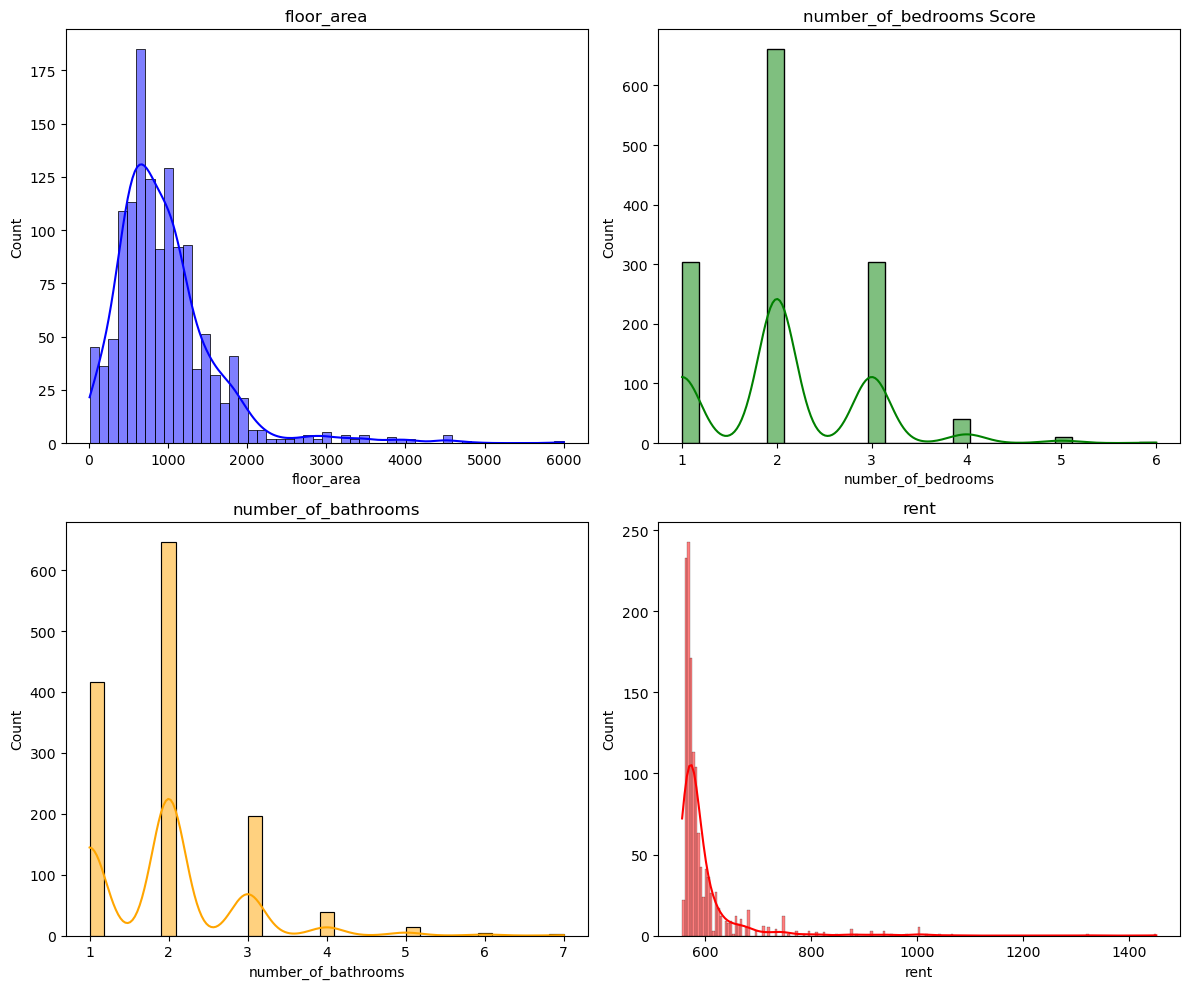

In [127]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the histograms for each of the specified columns
sns.histplot(validation_df['floor_area'], ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('floor_area')

sns.histplot(validation_df['number_of_bedrooms'], ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title('number_of_bedrooms Score')

sns.histplot(validation_df['number_of_bathrooms'], ax=axes[1, 0], kde=True, color='orange')
axes[1, 0].set_title('number_of_bathrooms')

sns.histplot(validation_df['rent'], ax=axes[1, 1], kde=True, color='red')
axes[1, 1].set_title('rent')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [128]:
validation_df[validation_df['floor_area'] > 4000]

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,first_name,last_name,gender,phone_number,email,advertised_year,advertised_month,advertised_day,current_level,total_level
39,2022-06-08,4,709.0,4105,11 out of 25,Brisbane,Semi-Furnished,Bachelors/Family,4,Contact Agent,...,Alicia,Wolfe,f,03-4185-2520,thomasmeyer@example.org,2022,6,8,11.0,25.0
139,2022-05-27,5,1323.0,4500,7 out of 20,Sydney,Furnished,Bachelors,5,Contact Agent,...,Gokul,Khatri,m,02.7642.8725,zroberts@example.com,2022,5,27,7.0,20.0
303,2022-05-24,5,683.0,6000,9 out of 12,Melbourne,Semi-Furnished,Bachelors/Family,4,Contact Agent,...,Cory,Murphy,u,03-9280-5043,ohoffman@example.net,2022,5,24,9.0,12.0
930,2022-07-02,4,722.0,4800,11 out of 19,Brisbane,Semi-Furnished,Bachelors/Family,4,Contact Agent,...,Thomas,Ortiz,m,0440.741.808,asanders@example.org,2022,7,2,11.0,19.0
947,2022-06-30,4,760.0,4500,4 out of 4,Brisbane,Unfurnished,Bachelors,4,Contact Agent,...,Jenna,Walker,f,08-0358-2545,kathrynwilson@example.com,2022,6,30,4.0,4.0
1157,2022-06-28,6,914.0,4500,Ground out of 1,Melbourne,Semi-Furnished,Bachelors,5,Contact Agent,...,Daniel,Newman,u,(02)-9983-7439,greenjames@example.org,2022,6,28,0.0,1.0
1213,2022-06-30,4,875.0,4500,Ground out of 2,Perth,Semi-Furnished,Family,4,Contact Agent,...,Meghan,Thompson,f,03.1857.7968,qesparza@example.net,2022,6,30,0.0,2.0
1223,2022-07-02,5,939.0,4050,Ground out of 5,Perth,Unfurnished,Bachelors/Family,4,Contact Owner,...,Amanda,Ray,f,6256.9986,christopherknapp@example.net,2022,7,2,0.0,5.0


In [129]:
#handling outliers through IQR METHOD.

In [130]:
q1 = validation_df['floor_area'].quantile(0.25)
q3 = validation_df['floor_area'].quantile(0.75)
iqr = q3-q1


In [131]:
lower_bound = q1 - 1.5 *iqr
upper_bound = q3 +1.5 *iqr


In [132]:
outliers = validation_df[(validation_df['floor_area'] < lower_bound) | (validation_df['floor_area'] > upper_bound)]
outliers



,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,first_name,last_name,gender,phone_number,email,advertised_year,advertised_month,advertised_day,current_level,total_level
22,2022-04-29,3,1003.0,3200,1 out of 2,Adelaide,Semi-Furnished,Bachelors/Family,4,Contact Owner,...,Rebecca,Jimenez,f,7493.2263,andreaellis@example.com,2022,4,29,1.0,2.0
37,2022-06-12,5,939.0,3000,2 out of 22,Sydney,Furnished,Bachelors/Family,5,Contact Agent,...,Travis,Hampton,m,0407-124-172,ginaparsons@example.org,2022,6,12,2.0,22.0
39,2022-06-08,4,709.0,4105,11 out of 25,Brisbane,Semi-Furnished,Bachelors/Family,4,Contact Agent,...,Alicia,Wolfe,f,03-4185-2520,thomasmeyer@example.org,2022,6,8,11.0,25.0
64,2022-05-17,4,939.0,2200,7 out of 8,Sydney,Furnished,Family,4,Contact Agent,...,Manuel,Cooper,m,02 7375 6683,westpaula@example.com,2022,5,17,7.0,8.0
96,2022-06-21,3,645.0,2780,4 out of 26,Perth,Semi-Furnished,Bachelors/Family,3,Contact Agent,...,Jack,Mccoy,u,0481-593-709,barry42@example.org,2022,6,21,4.0,26.0
132,2022-05-12,4,638.0,3200,18 out of 19,Brisbane,Semi-Furnished,Bachelors/Family,3,Contact Agent,...,Jamie,Schultz,f,+61.431.662.086,floydjessica@example.com,2022,5,12,18.0,19.0
139,2022-05-27,5,1323.0,4500,7 out of 20,Sydney,Furnished,Bachelors,5,Contact Agent,...,Gokul,Khatri,m,02.7642.8725,zroberts@example.com,2022,5,27,7.0,20.0
264,2022-05-31,5,1003.0,3250,12 out of 18,Sydney,Unfurnished,Family,5,Contact Agent,...,Samuel,Hurst,m,+61.2.2186.0016,carlpatel@example.net,2022,5,31,12.0,18.0
282,2022-06-10,3,613.0,2200,4 out of 4,Melbourne,Unfurnished,Bachelors/Family,3,Contact Agent,...,Lisa,Fields,f,(02)97411827,lgordon@example.org,2022,6,10,4.0,4.0
300,2022-05-23,4,619.0,2900,5 out of 7,Brisbane,Furnished,Bachelors/Family,4,Contact Owner,...,Amanda,Patterson,u,0241961692,jameshicks@example.org,2022,5,23,5.0,7.0


In [133]:
#saving the validation_df without the outliers

In [134]:
validation_df =validation_df[(validation_df['floor_area'] > lower_bound) & (validation_df['floor_area'] < upper_bound)]
validation_df

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,first_name,last_name,gender,phone_number,email,advertised_year,advertised_month,advertised_day,current_level,total_level
0,2022-06-13,2,571.0,560,Ground out of 1,Melbourne,Semi-Furnished,Family,2,Contact Owner,...,Jay,Glover,u,(03)08687820,brettkennedy@example.net,2022,6,13,0.0,1.0
1,2022-06-04,2,683.0,750,Upper Basement out of 30,Sydney,Unfurnished,Bachelors/Family,2,Contact Agent,...,Danielle,Tran,f,(03)-0313-6072,dana35@example.net,2022,6,4,-0.5,30.0
2,2022-04-29,3,574.0,950,Ground out of 3,Adelaide,Unfurnished,Bachelors/Family,2,Contact Owner,...,Ashley,Pacheco,u,08-9358-6662,justin89@example.org,2022,4,29,0.0,3.0
3,2022-05-18,1,565.0,500,2 out of 2,Sydney,Semi-Furnished,Bachelors,1,Contact Owner,...,Victoire,Weber,u,(02).9817.8199,pruittmichael@example.net,2022,5,18,2.0,2.0
4,2022-04-28,2,565.0,600,2 out of 3,Brisbane,Semi-Furnished,Bachelors/Family,2,Contact Owner,...,Kerry,Koch,f,4124.0210,hansendiana@example.com,2022,4,28,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2022-07-02,2,581.0,1350,8 out of 14,Perth,Semi-Furnished,Bachelors,2,Contact Owner,...,Brandon,Robinson,m,+61800919982,bobbywhite@example.net,2022,7,2,8.0,14.0
1315,2022-06-29,3,581.0,1100,2 out of 5,Perth,Semi-Furnished,Bachelors/Family,3,Contact Owner,...,Scott,Warren,u,0414.594.227,nayala@example.net,2022,6,29,2.0,5.0
1317,2022-06-28,3,594.0,214,2 out of 2,Perth,Furnished,Bachelors,4,Contact Owner,...,Kimaya,Bobal,f,+61.434.281.837,rharper@example.org,2022,6,28,2.0,2.0
1318,2022-06-28,1,562.0,500,Ground out of 1,Perth,Furnished,Bachelors/Family,1,Contact Owner,...,Andrea,Wood,f,+61-475-031-953,orivera@example.net,2022,6,28,0.0,1.0


In [135]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1319
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   advertised_date      1271 non-null   datetime64[ns]
 1   number_of_bedrooms   1271 non-null   int64         
 2   rent                 1271 non-null   float64       
 3   floor_area           1271 non-null   int64         
 4   level                1271 non-null   object        
 5   suburb               1271 non-null   object        
 6   furnished            1271 non-null   object        
 7   tenancy_preference   1271 non-null   object        
 8   number_of_bathrooms  1271 non-null   int64         
 9   point_of_contact     1271 non-null   object        
 10  secondary_address    1271 non-null   object        
 11  building_number      1271 non-null   int64         
 12  street_name          1271 non-null   object        
 13  street_suffix        1271 non-null   o

In [136]:
# @title Validation Set Insights

wgt_eda_validation_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Validation Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_validation_set_insights

Textarea(value='', description='Validation Set Insights:', layout=Layout(height='100%', width='auto'), placeho…

### C.4 Explore Testing Set

> You can add more cells in this section

In [137]:
# <Student to fill this section>

# TESTING SET

In [138]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      1364 non-null   object 
 1   number_of_bedrooms   1364 non-null   int64  
 2   rent                 1364 non-null   float64
 3   floor_area           1364 non-null   int64  
 4   level                1364 non-null   object 
 5   suburb               1364 non-null   object 
 6   furnished            1364 non-null   object 
 7   tenancy_preference   1364 non-null   object 
 8   number_of_bathrooms  1364 non-null   int64  
 9   point_of_contact     1364 non-null   object 
 10  secondary_address    1364 non-null   object 
 11  building_number      1364 non-null   int64  
 12  street_name          1364 non-null   object 
 13  street_suffix        1364 non-null   object 
 14  prefix               877 non-null    object 
 15  first_name           1364 non-null   o

In [139]:
testing_df.duplicated().sum()

0

In [140]:
#converting 'advertised_date' into datetime

In [141]:
testing_df['advertised_date'] = pd.to_datetime(testing_df['advertised_date'] )

In [142]:
#separating current level and total level column from column "level"

In [143]:
testing_df['current_level'] = testing_df['level'].apply(lambda x: -1 if 'Lower Basement' in x else
                                                             -0.5 if 'Upper Basement' in x else
                                                              0 if 'Ground' in x else
                                                             int(x.split(' ')[0]))

In [144]:
testing_df['total_level'] = testing_df['level'].str.extract(r' out of (\d+)')

In [145]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   advertised_date      1364 non-null   datetime64[ns]
 1   number_of_bedrooms   1364 non-null   int64         
 2   rent                 1364 non-null   float64       
 3   floor_area           1364 non-null   int64         
 4   level                1364 non-null   object        
 5   suburb               1364 non-null   object        
 6   furnished            1364 non-null   object        
 7   tenancy_preference   1364 non-null   object        
 8   number_of_bathrooms  1364 non-null   int64         
 9   point_of_contact     1364 non-null   object        
 10  secondary_address    1364 non-null   object        
 11  building_number      1364 non-null   int64         
 12  street_name          1364 non-null   object        
 13  street_suffix        1364 non-nul

In [146]:
#notice how current level is float and total level as object, this will cause inconsitency while building model.
#We change it to float

In [147]:
testing_df['total_level'] = testing_df['total_level'].astype(float)

In [148]:
testing_df.dtypes

advertised_date        datetime64[ns]
number_of_bedrooms              int64
rent                          float64
floor_area                      int64
level                          object
suburb                         object
furnished                      object
tenancy_preference             object
number_of_bathrooms             int64
point_of_contact               object
secondary_address              object
building_number                 int64
street_name                    object
street_suffix                  object
prefix                         object
first_name                     object
last_name                      object
gender                         object
phone_number                   object
email                          object
current_level                 float64
total_level                   float64
dtype: object

In [149]:
#extracting year month and day column "advertised time"

In [150]:
testing_df['advertised_year'] = testing_df['advertised_date'].dt.year
testing_df['advertised_month'] = testing_df['advertised_date'].dt.month
testing_df['advertised_day'] = testing_df['advertised_date'].dt.day

In [151]:
testing_df['total_level'].astype(float)

0        1.0
1       30.0
2        3.0
3        2.0
4        3.0
        ... 
1359     2.0
1360     5.0
1361     4.0
1362     5.0
1363    34.0
Name: total_level, Length: 1364, dtype: float64

<Axes: xlabel='rent', ylabel='Count'>

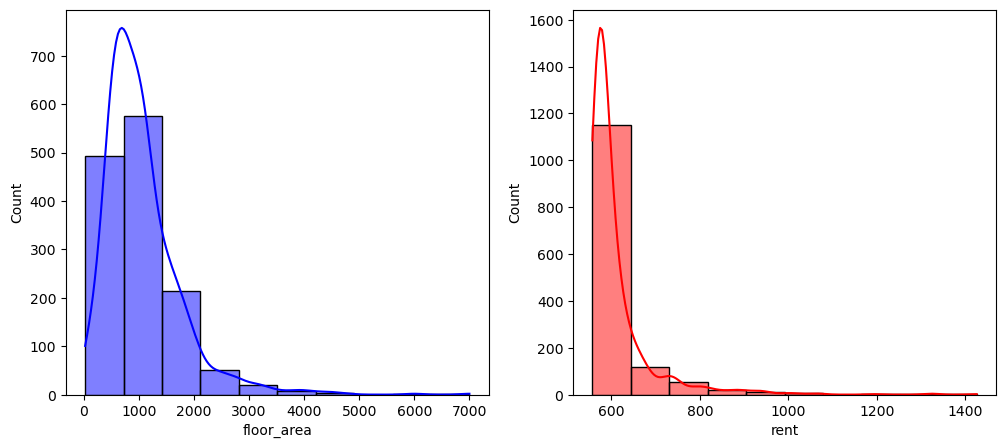

In [152]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.histplot(testing_df['floor_area'],ax = axes[0], bins = 10, kde = True, color = 'blue')
sns.histplot(testing_df['rent'], bins = 10, ax = axes[1], kde = True, color = 'red')


In [153]:
testing_df[testing_df['rent'] > 1000]

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,first_name,last_name,gender,phone_number,email,current_level,total_level,advertised_year,advertised_month,advertised_day
22,2022-04-29,3,1003.0,3200,1 out of 2,Adelaide,Semi-Furnished,Bachelors/Family,4,Contact Owner,...,Rebecca,Jimenez,f,7493.2263,andreaellis@example.com,1.0,2.0,2022,4,29
78,2022-06-08,3,1003.0,1663,19 out of 85,Sydney,Semi-Furnished,Bachelors/Family,2,Contact Agent,...,Christine,Baker,f,(08)24473521,douglasmarquez@example.org,19.0,85.0,2022,6,8
139,2022-05-27,5,1323.0,4500,7 out of 20,Sydney,Furnished,Bachelors,5,Contact Agent,...,Gokul,Khatri,m,02.7642.8725,zroberts@example.com,7.0,20.0,2022,5,27
264,2022-05-31,5,1003.0,3250,12 out of 18,Sydney,Unfurnished,Family,5,Contact Agent,...,Samuel,Hurst,m,+61.2.2186.0016,carlpatel@example.net,12.0,18.0,2022,5,31
811,2022-07-09,5,1195.0,3900,4 out of 6,Sydney,Furnished,Bachelors/Family,5,Contact Agent,...,Kathy,Mendez,f,9377 5298,qgeorge@example.net,4.0,6.0,2022,7,9
828,2022-07-09,4,1042.0,2800,50 out of 75,Sydney,Semi-Furnished,Bachelors/Family,4,Contact Agent,...,Joshua,Fletcher,m,68397365,adamle@example.org,50.0,75.0,2022,7,9
911,2022-07-09,4,1067.0,2080,34 out of 46,Sydney,Semi-Furnished,Bachelors/Family,5,Contact Agent,...,Andre,Daniel,u,+61.495.517.273,pricejames@example.net,34.0,46.0,2022,7,9
921,2022-07-07,4,1426.0,1962,18 out of 20,Sydney,Semi-Furnished,Bachelors/Family,5,Contact Agent,...,Christopher,Thompson,u,+61.419.781.592,webbbrian@example.net,18.0,20.0,2022,7,7
1160,2022-07-06,2,1323.0,950,1 out of 1,Melbourne,Unfurnished,Bachelors,2,Contact Owner,...,Teresa,Taylor,f,0876215458,wayne30@example.org,1.0,1.0,2022,7,6
1308,2022-07-06,4,1067.0,7000,Lower Basement out of 2,Perth,Semi-Furnished,Bachelors/Family,6,Contact Agent,...,Eugene,Cook,m,(03).6616.8618,ejohnson@example.com,-1.0,2.0,2022,7,6


In [154]:
# @title Testing Set Insights

wgt_eda_testing_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Testing Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_testing_set_insights

Textarea(value='', description='Testing Set Insights:', layout=Layout(height='100%', width='auto'), placeholde…

### C.5 Explore Target Variable

> Save the name of column used as the target variable and call it `target_name`

> You can add more cells in this section

In [155]:
# <Student to fill this section>

target_name = 'rent'

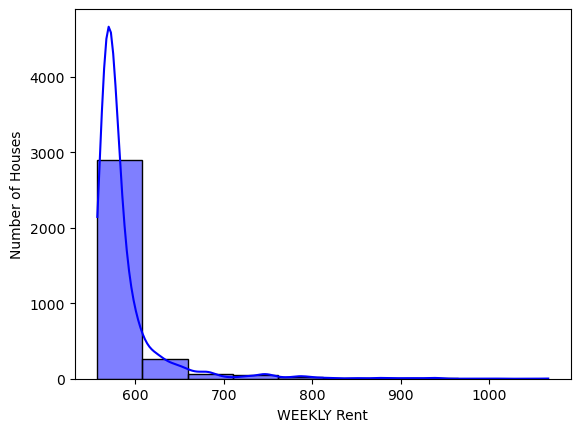

In [156]:
sns.histplot(training_cleaned['rent'], bins =10,kde = True, color = 'blue')
plt.xlabel('WEEKLY Rent')
plt.ylabel('Number of Houses')
plt.show()

In [157]:
# @title Target Variable Insights

wgt_eda_target_variable_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Target Variable Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_target_variable_insights

Textarea(value='', description='Target Variable Insights:', layout=Layout(height='100%', width='auto'), placeh…

### C.6 Explore Feature of Interest

> You can add more cells in this section

In [158]:
# <Student to fill this section>

In [159]:
training_cleaned.dtypes

advertised_date        datetime64[ns]
number_of_bedrooms              int64
rent                          float64
floor_area                      int64
level                          object
suburb                         object
furnished                      object
tenancy_preference             object
number_of_bathrooms             int64
point_of_contact               object
secondary_address              object
building_number                 int64
street_name                    object
street_suffix                  object
prefix                         object
first_name                     object
last_name                      object
gender                         object
phone_number                   object
email                          object
yearmonth                   period[M]
advertised_year                 int32
advertised_month                int32
advertised_day                  int32
current_level                 float64
total_level                    object
dtype: objec

In [160]:
training_cleaned.describe().T

,count,mean,min,25%,50%,75%,max,std
advertised_date,3316,2022-05-28 11:26:33.727382528,2022-04-13 00:00:00,2022-05-14 00:00:00,2022-05-27 00:00:00,2022-06-13 06:00:00,2022-06-26 00:00:00,NaN
number_of_bedrooms,3316.0,1.965018,1.0,1.0,2.0,2.0,6.0,0.751458
rent,3316.0,586.813314,557.0,567.0,574.0,587.0,1067.0,43.304978
floor_area,3316.0,848.947226,20.0,510.0,800.0,1100.0,2100.0,433.457728
number_of_bathrooms,3316.0,1.809107,1.0,1.0,2.0,2.0,6.0,0.739362
building_number,3316.0,189.539204,0.0,7.0,46.0,269.0,998.0,284.592786
advertised_year,3316.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,0.0
advertised_month,3316.0,5.372437,4.0,5.0,5.0,6.0,6.0,0.608398
advertised_day,3316.0,16.863088,1.0,10.0,18.0,23.0,31.0,8.364109
current_level,3316.0,2.844542,-1.0,1.0,2.0,3.0,76.0,4.909747


In [161]:
#exploring numerical features of interest

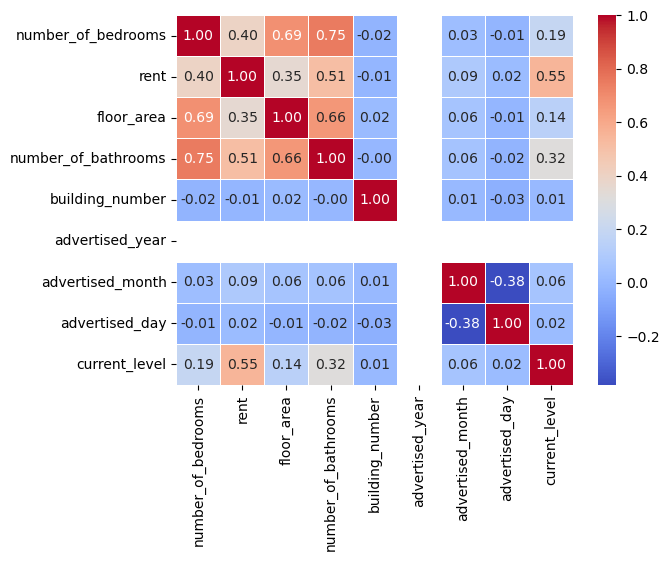

In [162]:
corr_matrix = training_cleaned.select_dtypes(include = ['number'])
matrix = corr_matrix.corr()
sns.heatmap(matrix, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5 )
plt.show()

# insights from the heat map

In [163]:
#Number of Bedrooms is highly correlated with Floor Area (0.69) and Number of Bathrooms (0.75). This makes sense since larger homes tend to have more rooms.
#Rent shows a moderate correlation with Number of Bedrooms (0.40) and a stronger one with Current Level (0.55), suggesting higher floors might command higher rents.
#Floor Area and Number of Bathrooms also have a strong correlation (0.66), indicating that larger homes often have more bathrooms.

In [164]:
# @title Feature Insights

wgt_eda_feature_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_feature_insights

Textarea(value='', description='Feature Insights:', layout=Layout(height='100%', width='auto'), placeholder='<…

---
## D. Feature Selection


### D.1 Approach 1

In [165]:
# <Student to fill this section>

In [166]:
# @title Feature Selection 1 Insights

wgt_feat_selection_1_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection 1:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_1_insights

Textarea(value='', description='Feature Selection 1:', layout=Layout(height='100%', width='auto'), placeholder…

### D.2 Approach 2

In [167]:
# <Student to fill this section>

In [168]:
# @title Feature Selection 2 Insights

wgt_feat_selection_2_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection 2:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_2_insights

Textarea(value='', description='Feature Selection 2:', layout=Layout(height='100%', width='auto'), placeholder…

## D.3 Final Selection of Features

> Save the names of selected features into a list called `features_list`

In [169]:
training_cleaned.columns

Index(['advertised_date', 'number_of_bedrooms', 'rent', 'floor_area', 'level',
       'suburb', 'furnished', 'tenancy_preference', 'number_of_bathrooms',
       'point_of_contact', 'secondary_address', 'building_number',
       'street_name', 'street_suffix', 'prefix', 'first_name', 'last_name',
       'gender', 'phone_number', 'email', 'yearmonth', 'advertised_year',
       'advertised_month', 'advertised_day', 'current_level', 'total_level'],
      dtype='object')

In [170]:
# <Student to fill this section>

features_list = ['number_of_bedrooms', 'rent', 'floor_area', 'current_level', 'total_level','suburb', 'furnished'
                ,'tenancy_preference','number_of_bathrooms','advertised_month']

In [171]:
# @title Feature Selection Explanation

wgt_feat_selection_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_explanation

Textarea(value='', description='Feature Selection Explanation:', layout=Layout(height='100%', width='auto'), p…

---
## E. Data Cleaning

### E.1 Copy Datasets

> Create copies of the datasets and called them `training_df_clean`, `validation_df_clean` and `testing_df_clean`

> Do not change this code

# I have changed training_df to training_cleaned because I changed it above during analysis, nothing changes.

In [172]:
# Create copy of datasets

training_df_clean = training_cleaned[features_list].copy()
validation_df_clean = validation_df[features_list].copy()
testing_df_clean = testing_df[features_list].copy()

### E.2 Fixing "\<CHANGING DTYPES.\>"

> Provide some explanations on why you believe it is important to fix this issue and its impacts

1) converted total_levels to float. 2)REASON: CURRENT_LEVEL HAS UPPER AND LOWER BASEMENT WHICH WERE CONVERTED TO -0.5 AND -1 BASED ON THE BUSINESS LOGIC BECAUSE GROUND FLOOR WAS CONVERTED TO 0.

> You can add more cells in this section

In [173]:
# <Student to fill this section>

In [174]:
training_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3316 entries, 0 to 3433
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_of_bedrooms   3316 non-null   int64  
 1   rent                 3316 non-null   float64
 2   floor_area           3316 non-null   int64  
 3   current_level        3316 non-null   float64
 4   total_level          3316 non-null   object 
 5   suburb               3316 non-null   object 
 6   furnished            3316 non-null   object 
 7   tenancy_preference   3316 non-null   object 
 8   number_of_bathrooms  3316 non-null   int64  
 9   advertised_month     3316 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 401.1+ KB


In [175]:
#converting total_levels to float because current level is in float.

In [176]:
training_df_clean['total_level'] = training_df_clean['total_level'].astype(float)

In [177]:
#VALIDATION
validation_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1319
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_of_bedrooms   1271 non-null   int64  
 1   rent                 1271 non-null   float64
 2   floor_area           1271 non-null   int64  
 3   current_level        1271 non-null   float64
 4   total_level          1271 non-null   float64
 5   suburb               1271 non-null   object 
 6   furnished            1271 non-null   object 
 7   tenancy_preference   1271 non-null   object 
 8   number_of_bathrooms  1271 non-null   int64  
 9   advertised_month     1271 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 104.3+ KB


In [178]:
#TESTING
testing_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_of_bedrooms   1364 non-null   int64  
 1   rent                 1364 non-null   float64
 2   floor_area           1364 non-null   int64  
 3   current_level        1364 non-null   float64
 4   total_level          1364 non-null   float64
 5   suburb               1364 non-null   object 
 6   furnished            1364 non-null   object 
 7   tenancy_preference   1364 non-null   object 
 8   number_of_bathrooms  1364 non-null   int64  
 9   advertised_month     1364 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 101.4+ KB


In [179]:
# @title Data Cleaning 1 Explanation

wgt_data_cleaning_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Cleaning 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_cleaning_1_explanation

Textarea(value='', description='Data Cleaning 1 Explanation:', layout=Layout(height='100%', width='auto'), pla…

### E.3 Fixing "\<describe_issue_here\>"

> Provide some explanations on why you believe it is important to fix this issue and its impacts

> You can add more cells in this section

In [180]:
# <Student to fill this section>

In [181]:
# @title Data Cleaning 2 Explanation

wgt_data_cleaning_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Cleaning 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_cleaning_2_explanation

Textarea(value='', description='Data Cleaning 1 Explanation:', layout=Layout(height='100%', width='auto'), pla…

### E.4 Fixing "\<describe_issue_here\>"

> Provide some explanations on why you believe it is important to fix this issue and its impacts

> You can add more cells in this section

In [182]:
# <Student to fill this section>

In [183]:
# @title Data Cleaning 3 Explanation

wgt_data_cleaning_3_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Cleaning 3 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_cleaning_3_explanation

Textarea(value='', description='Data Cleaning 3 Explanation:', layout=Layout(height='100%', width='auto'), pla…

---
## F. Feature Engineering

### F.1 Copy Datasets

> Create copies of the datasets and called them `training_df_eng`, `validation_df_eng` and `testing_df_eng`

> Do not change this code

In [184]:
# Create copy of datasets

training_df_eng = training_df_clean.copy()
validation_df_eng = validation_df_clean.copy()
testing_df_eng = testing_df_clean.copy()

In [185]:
training_df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3316 entries, 0 to 3433
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_of_bedrooms   3316 non-null   int64  
 1   rent                 3316 non-null   float64
 2   floor_area           3316 non-null   int64  
 3   current_level        3316 non-null   float64
 4   total_level          3316 non-null   float64
 5   suburb               3316 non-null   object 
 6   furnished            3316 non-null   object 
 7   tenancy_preference   3316 non-null   object 
 8   number_of_bathrooms  3316 non-null   int64  
 9   advertised_month     3316 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 401.1+ KB


In [186]:
validation_df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1319
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_of_bedrooms   1271 non-null   int64  
 1   rent                 1271 non-null   float64
 2   floor_area           1271 non-null   int64  
 3   current_level        1271 non-null   float64
 4   total_level          1271 non-null   float64
 5   suburb               1271 non-null   object 
 6   furnished            1271 non-null   object 
 7   tenancy_preference   1271 non-null   object 
 8   number_of_bathrooms  1271 non-null   int64  
 9   advertised_month     1271 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 104.3+ KB


In [187]:
testing_df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_of_bedrooms   1364 non-null   int64  
 1   rent                 1364 non-null   float64
 2   floor_area           1364 non-null   int64  
 3   current_level        1364 non-null   float64
 4   total_level          1364 non-null   float64
 5   suburb               1364 non-null   object 
 6   furnished            1364 non-null   object 
 7   tenancy_preference   1364 non-null   object 
 8   number_of_bathrooms  1364 non-null   int64  
 9   advertised_month     1364 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 101.4+ KB


In [188]:
training_df_eng['advertised_month'].value_counts()

advertised_month
5    1629
6    1461
4     226
Name: count, dtype: int64

In [189]:
validation_df_eng['advertised_month'].value_counts()

advertised_month
6    601
5    343
7    288
4     39
Name: count, dtype: int64

In [190]:
testing_df_eng['advertised_month'].value_counts()

advertised_month
7    678
5    352
6    294
4     40
Name: count, dtype: int64

In [191]:
month_07_val = validation_df_eng[validation_df_eng['advertised_month'] == 7]

In [192]:
month_07_test = testing_df_eng[testing_df_eng['advertised_month'] == 7]

# Note: The training set does not contain data for the month of July (07).
# We will analyze the validation and testing sets to determine how many values correspond to the month of July (07).

# Due to data limitation in the training set we will have to drop the the months 07 from validation and testing

In [193]:
testing_df_eng = testing_df_eng[testing_df_eng['advertised_month'] != 7]
validation_df_eng = validation_df_eng[validation_df_eng['advertised_month'] != 7]

In [194]:
testing_df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686 entries, 0 to 685
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_of_bedrooms   686 non-null    int64  
 1   rent                 686 non-null    float64
 2   floor_area           686 non-null    int64  
 3   current_level        686 non-null    float64
 4   total_level          686 non-null    float64
 5   suburb               686 non-null    object 
 6   furnished            686 non-null    object 
 7   tenancy_preference   686 non-null    object 
 8   number_of_bathrooms  686 non-null    int64  
 9   advertised_month     686 non-null    int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 56.3+ KB


In [195]:
validation_df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 1319
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_of_bedrooms   983 non-null    int64  
 1   rent                 983 non-null    float64
 2   floor_area           983 non-null    int64  
 3   current_level        983 non-null    float64
 4   total_level          983 non-null    float64
 5   suburb               983 non-null    object 
 6   furnished            983 non-null    object 
 7   tenancy_preference   983 non-null    object 
 8   number_of_bathrooms  983 non-null    int64  
 9   advertised_month     983 non-null    int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 80.6+ KB


### F.2 New Feature "\<CURRENT_LEVEL\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts

1) Separated the column 'level' which was in a format eg: x out of y format. where x was converted into current_level


In [196]:
# <Student to fill this section>

In [197]:
training_df_eng['current_level']

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
3429    4.0
3430    2.0
3431    3.0
3432    1.0
3433    4.0
Name: current_level, Length: 3316, dtype: float64

In [198]:
# @title Feature Engineering 1 Explanation

wgt_feature_engineering_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_1_explanation

Textarea(value='', description='Feature Engineering 1 Explanation:', layout=Layout(height='100%', width='auto'…

### F.3 New Feature "\<TOTAL_LEVEL ,  ADVERTISED_MONTH\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts

1) these were the total levels of the house. For eg: x out of y, here y- was converted into total_level
2) advertised month was extracted from the original feature advertised time. Since the data holds information on 2022 year and only accounts for 3 months. Hence, became important for removing redundant features like year .

In [199]:
# <Student to fill this section>

In [200]:
# @title Feature Engineering 2 Explanation

wgt_feature_engineering_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 2 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_2_explanation

Textarea(value='', description='Feature Engineering 2 Explanation:', layout=Layout(height='100%', width='auto'…

### F.4 New Feature "\<average_rent_bath&bed\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [201]:
#since bed bath have a affect on rental prices, my thinking behind adding this feature was to give model a chance to 
#understand the pattern better.

In [202]:
# <Student to fill this section>

In [203]:
training_df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3316 entries, 0 to 3433
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_of_bedrooms   3316 non-null   int64  
 1   rent                 3316 non-null   float64
 2   floor_area           3316 non-null   int64  
 3   current_level        3316 non-null   float64
 4   total_level          3316 non-null   float64
 5   suburb               3316 non-null   object 
 6   furnished            3316 non-null   object 
 7   tenancy_preference   3316 non-null   object 
 8   number_of_bathrooms  3316 non-null   int64  
 9   advertised_month     3316 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 401.1+ KB


# creating new variables for experiment 2

# average rent per bedroom &bathroom.

In [204]:
training_df_eng['average_rent_bath&bed'] = training_df_eng.groupby(['number_of_bedrooms' , 'number_of_bathrooms'])['rent'].transform('mean').round(2)

In [205]:
training_df_eng

,number_of_bedrooms,rent,floor_area,current_level,total_level,suburb,furnished,tenancy_preference,number_of_bathrooms,advertised_month,average_rent_bath&bed
0,2,568.0,1100,0.0,2.0,Canberra,Unfurnished,Bachelors/Family,2,5,583.42
1,2,581.0,800,1.0,3.0,Canberra,Semi-Furnished,Bachelors/Family,1,5,569.09
2,2,577.0,1000,1.0,3.0,Canberra,Semi-Furnished,Bachelors/Family,1,5,569.09
3,2,565.0,850,1.0,2.0,Canberra,Unfurnished,Bachelors,1,5,569.09
4,2,564.0,600,0.0,1.0,Canberra,Unfurnished,Bachelors/Family,2,4,583.42
...,...,...,...,...,...,...,...,...,...,...,...
3429,3,600.0,1250,4.0,5.0,Perth,Furnished,Bachelors,2,6,592.44
3430,2,571.0,1350,2.0,2.0,Perth,Unfurnished,Bachelors/Family,2,6,583.42
3431,2,574.0,1000,3.0,5.0,Perth,Semi-Furnished,Bachelors/Family,2,5,583.42
3432,3,592.0,2000,1.0,4.0,Perth,Semi-Furnished,Bachelors/Family,3,5,621.25


In [206]:
#validation df 

In [207]:
validation_df_eng['average_rent_bath&bed'] = validation_df_eng.groupby(['number_of_bedrooms' , 'number_of_bathrooms'])['rent'].transform('mean').round(2)

In [208]:
#testing df

In [209]:
testing_df_eng['average_rent_bath&bed'] = testing_df_eng.groupby(['number_of_bedrooms' , 'number_of_bathrooms'])['rent'].transform('mean').round(2)

In [210]:
# @title Feature Engineering 3 Explanation

wgt_feature_engineering_3_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 3 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_3_explanation

Textarea(value='', description='Feature Engineering 3 Explanation:', layout=Layout(height='100%', width='auto'…

---
## G. Data Preparation for Modeling

### G.1 Copy Datasets

> Create copies of the datasets and split them into X and y

> Do not change this code

In [211]:
# Create copy of datasets

X_train = training_df_eng.copy()
X_val = validation_df_eng.copy()
X_test = testing_df_eng.copy()

y_train = X_train.pop(target_name)
y_val = X_val.pop(target_name)
y_test = X_test.pop(target_name)

### G.2 Data Transformation <put_name_here>

> Provide some explanations on why you believe it is important to perform this data transformation and its impacts


In [212]:
# <Student to fill this section>

In [213]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3316 entries, 0 to 3433
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number_of_bedrooms     3316 non-null   int64  
 1   floor_area             3316 non-null   int64  
 2   current_level          3316 non-null   float64
 3   total_level            3316 non-null   float64
 4   suburb                 3316 non-null   object 
 5   furnished              3316 non-null   object 
 6   tenancy_preference     3316 non-null   object 
 7   number_of_bathrooms    3316 non-null   int64  
 8   advertised_month       3316 non-null   int32  
 9   average_rent_bath&bed  3316 non-null   float64
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 401.1+ KB


In [214]:
# using one-hot-encoding approach we convert furnished & tenancy_preference & suburbs

In [215]:
#train
X_train = pd.get_dummies(X_train, columns = ['suburb', 'furnished', 'tenancy_preference'], dtype = int)
                        

In [216]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3316 entries, 0 to 3433
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number_of_bedrooms                   3316 non-null   int64  
 1   floor_area                           3316 non-null   int64  
 2   current_level                        3316 non-null   float64
 3   total_level                          3316 non-null   float64
 4   number_of_bathrooms                  3316 non-null   int64  
 5   advertised_month                     3316 non-null   int32  
 6   average_rent_bath&bed                3316 non-null   float64
 7   suburb_Adelaide                      3316 non-null   int64  
 8   suburb_Brisbane                      3316 non-null   int64  
 9   suburb_Canberra                      3316 non-null   int64  
 10  suburb_Melbourne                     3316 non-null   int64  
 11  suburb_Perth                       

In [217]:
#val
X_val = pd.get_dummies(X_val, columns = ['suburb', 'furnished', 'tenancy_preference'],  dtype = int)
                        

In [218]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 1319
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number_of_bedrooms                   983 non-null    int64  
 1   floor_area                           983 non-null    int64  
 2   current_level                        983 non-null    float64
 3   total_level                          983 non-null    float64
 4   number_of_bathrooms                  983 non-null    int64  
 5   advertised_month                     983 non-null    int32  
 6   average_rent_bath&bed                983 non-null    float64
 7   suburb_Adelaide                      983 non-null    int64  
 8   suburb_Brisbane                      983 non-null    int64  
 9   suburb_Canberra                      983 non-null    int64  
 10  suburb_Melbourne                     983 non-null    int64  
 11  suburb_Perth                        

In [219]:
#test
X_test =pd.get_dummies(X_test, columns = ['suburb', 'furnished', 'tenancy_preference'],  dtype = int)


In [220]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number_of_bedrooms                   686 non-null    int64  
 1   floor_area                           686 non-null    int64  
 2   current_level                        686 non-null    float64
 3   total_level                          686 non-null    float64
 4   number_of_bathrooms                  686 non-null    int64  
 5   advertised_month                     686 non-null    int32  
 6   average_rent_bath&bed                686 non-null    float64
 7   suburb_Adelaide                      686 non-null    int64  
 8   suburb_Brisbane                      686 non-null    int64  
 9   suburb_Canberra                      686 non-null    int64  
 10  suburb_Melbourne                     686 non-null    int64  
 11  suburb_Perth                         

In [221]:
# @title Data Preparation 1 Explanation

wgt_data_preparation_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Preparation 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_preparation_1_explanation

Textarea(value='', description='Data Preparation 1 Explanation:', layout=Layout(height='100%', width='auto'), …

### G.3 Data Transformation <put_name_here>

> Provide some explanations on why you believe it is important to perform this data transformation and its impacts


In [222]:
# @title Data Preparation 2 Explanation

wgt_data_preparation_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Preparation 2 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_preparation_2_explanation

Textarea(value='', description='Data Preparation 2 Explanation:', layout=Layout(height='100%', width='auto'), …

### G.4 Data Transformation <put_name_here>

> Provide some explanations on why you believe it is important to perform this data transformation and its impacts


In [223]:
# @title Data Preparation 3 Explanation

wgt_data_preparation_3_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Preparation 3 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_preparation_3_explanation

Textarea(value='', description='Data Preparation 3 Explanation:', layout=Layout(height='100%', width='auto'), …

---
## H. Save Datasets

> Do not change this code

In [224]:
pwd

'/Users/ratikpant/Desktop/machine learning'

In [225]:
# Save training set

X_train.to_csv('/Users/ratikpant/Desktop/machine learning/ X_train.csv', index=False)
y_train.to_csv('/Users/ratikpant/Desktop/machine learning/ y_train.csv', index=False)

In [226]:
# Save validation set

X_val.to_csv('/Users/ratikpant/Desktop/machine learning/ X_val.csv', index=False)
y_val.to_csv('/Users/ratikpant/Desktop/machine learning/ y_val.csv', index=False)

In [227]:
# Save testing set

X_test.to_csv('/Users/ratikpant/Desktop/machine learning/X_test.csv', index=False)
y_test.to_csv('/Users/ratikpant/Desktop/machine learning/y_test.csv', index=False)

# saving future month 07 validation

In [228]:
month_07_val

,number_of_bedrooms,rent,floor_area,current_level,total_level,suburb,furnished,tenancy_preference,number_of_bathrooms,advertised_month
686,2,568.0,800,1.0,2.0,Canberra,Unfurnished,Bachelors/Family,1,7
687,2,565.0,650,1.0,2.0,Canberra,Unfurnished,Family,1,7
690,2,571.0,650,0.0,1.0,Canberra,Unfurnished,Family,2,7
691,2,562.0,800,0.0,1.0,Canberra,Unfurnished,Bachelors/Family,1,7
692,2,564.0,650,0.0,3.0,Canberra,Semi-Furnished,Bachelors/Family,2,7
...,...,...,...,...,...,...,...,...,...,...
1308,2,565.0,900,0.0,2.0,Perth,Semi-Furnished,Bachelors,2,7
1311,2,565.0,800,1.0,6.0,Perth,Furnished,Bachelors/Family,2,7
1312,1,564.0,650,3.0,3.0,Perth,Semi-Furnished,Bachelors/Family,1,7
1313,2,568.0,1125,2.0,3.0,Perth,Unfurnished,Bachelors,2,7


In [229]:
month_07_val.to_csv('/Users/ratikpant/Desktop/machine learning/ month_07_val', index=False)

# saving future month 07 test

In [245]:
month_07_test

,number_of_bedrooms,rent,floor_area,current_level,total_level,suburb,furnished,tenancy_preference,number_of_bathrooms,advertised_month
686,2,566.0,720,4.0,4.0,Canberra,Semi-Furnished,Bachelors/Family,2,7
687,2,587.0,1100,2.0,2.0,Canberra,Furnished,Bachelors,2,7
688,3,571.0,800,0.0,1.0,Canberra,Unfurnished,Bachelors/Family,2,7
689,2,564.0,600,0.0,2.0,Canberra,Unfurnished,Bachelors,1,7
690,3,583.0,1150,1.0,2.0,Canberra,Unfurnished,Bachelors/Family,2,7
...,...,...,...,...,...,...,...,...,...,...
1359,3,574.0,1500,-1.0,2.0,Perth,Semi-Furnished,Bachelors/Family,3,7
1360,2,577.0,855,4.0,5.0,Perth,Unfurnished,Bachelors,2,7
1361,2,587.0,1040,2.0,4.0,Perth,Unfurnished,Bachelors,2,7
1362,3,600.0,1750,3.0,5.0,Perth,Semi-Furnished,Bachelors/Family,3,7


In [231]:
month_07_test.to_csv('/Users/ratikpant/Desktop/machine learning/ month_07_test', index=False)

---
## I. Assess Baseline Model

### I.1 Generate Predictions with Baseline Model

In [232]:
# <Student to fill this section>

### I.2 Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [234]:
base = LinearRegression()

In [235]:
base = base.fit(X_train,y_train)

In [236]:
y_val_pred = base.predict(X_val)

In [237]:
mse_val = mse(y_val_pred, y_val)
rmse = np.sqrt(mse_val)
print("rmse score is:", rmse)

rmse score is: 26.140506655579017


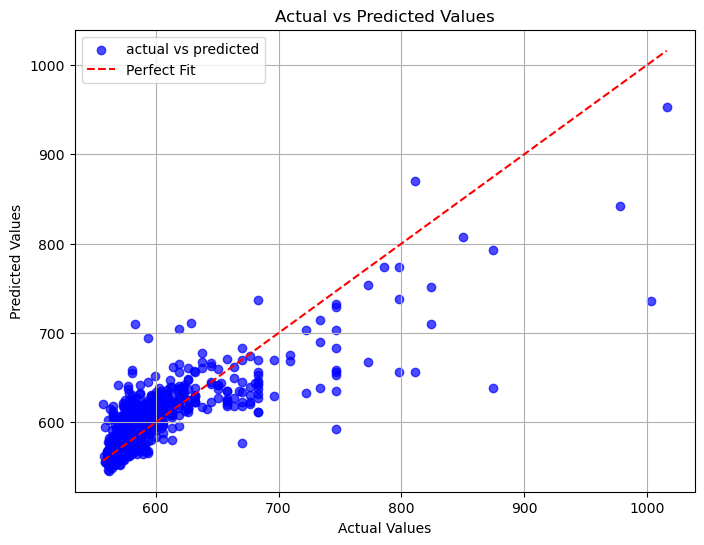

In [238]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7, color='blue', label='actual vs predicted')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [239]:
y_test_pred = base.predict(X_test)

In [240]:
mse_test = mse(y_test_pred, y_test)
rmsee = np.sqrt(mse_test)
print("rmse score is:", rmsee)

rmse score is: 30.693638176631456


# performing the baseline model also on the future rent prediction to finally see which out of all the models generalises well with the future rent prices.

In [246]:
model_7_aligned = month_07_test.reindex(columns = X_train.columns , fill_value = 0)

In [248]:
model_7_aligned['rent'] = month_07_test['rent']

In [249]:
model_7_aligned

,number_of_bedrooms,floor_area,current_level,total_level,number_of_bathrooms,advertised_month,average_rent_bath&bed,suburb_Adelaide,suburb_Brisbane,suburb_Canberra,suburb_Melbourne,suburb_Perth,suburb_Sydney,furnished_Furnished,furnished_Semi-Furnished,furnished_Unfurnished,tenancy_preference_Bachelors,tenancy_preference_Bachelors/Family,tenancy_preference_Family,rent
686,2,720,4.0,4.0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,566.0
687,2,1100,2.0,2.0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,587.0
688,3,800,0.0,1.0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,571.0
689,2,600,0.0,2.0,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,564.0
690,3,1150,1.0,2.0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,3,1500,-1.0,2.0,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,574.0
1360,2,855,4.0,5.0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,577.0
1361,2,1040,2.0,4.0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,587.0
1362,3,1750,3.0,5.0,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,600.0


In [ ]:
model_7_aligned['']

In [254]:
from sklearn.preprocessing import MinMaxScaler


In [255]:
scaler = StandardScaler()

In [256]:
features_to_scale = ['floor_area', 'total_level', 'current_level']

In [257]:
model_7_aligned[features_to_scale] = scaler.fit_transform(model_7_aligned[features_to_scale])

In [258]:
model_7_aligned

,number_of_bedrooms,floor_area,current_level,total_level,number_of_bathrooms,advertised_month,average_rent_bath&bed,suburb_Adelaide,suburb_Brisbane,suburb_Canberra,suburb_Melbourne,suburb_Perth,suburb_Sydney,furnished_Furnished,furnished_Semi-Furnished,furnished_Unfurnished,tenancy_preference_Bachelors,tenancy_preference_Bachelors/Family,tenancy_preference_Family,rent
686,2,-0.619113,-0.271703,-0.605285,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,566.0
687,2,-0.111422,-0.505552,-0.747953,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,587.0
688,3,-0.512231,-0.739402,-0.819287,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,571.0
689,2,-0.779436,-0.739402,-0.747953,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,564.0
690,3,-0.044621,-0.622477,-0.747953,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,3,0.422989,-0.856326,-0.747953,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,574.0
1360,2,-0.438749,-0.271703,-0.533951,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,577.0
1361,2,-0.191584,-0.505552,-0.605285,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,587.0
1362,3,0.756996,-0.388628,-0.533951,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,600.0


In [259]:
X_fut = model_7_aligned

In [260]:
y_fut = X_fut.pop('rent')

In [261]:
y_fut_pred = base.predict(X_fut)

In [264]:
mse_fut = mse(y_fut_pred,y_fut)
rmse_fut = np.sqrt(mse_fut)
print("the rmse score is: ", rmse_fut)

the rmse score is:  463.49426931508003


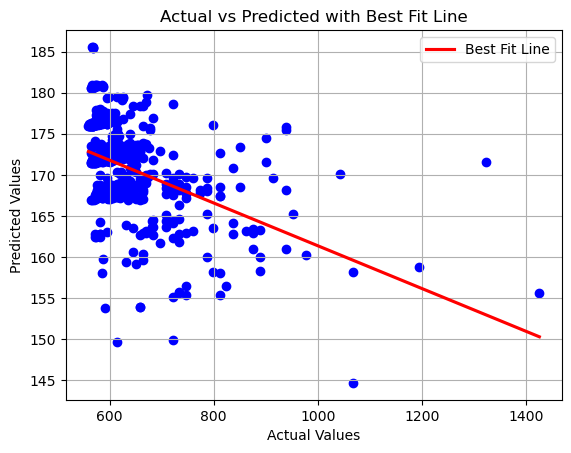

In [270]:
plt.scatter(y_fut, y_fut_pred,color = 'blue' )
sns.regplot(x=y_fut, y=y_fut_pred, scatter=False , color='red', label='Best Fit Line', ci=None)

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Best Fit Line')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7, color='blue', label='actual vs predicted')
sns.regplot(y_val, y_val color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [241]:
# <Student to fill this section>

In [242]:
# @title Performance Metrics Explanation

wgt_perf_metrics_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Performance Metrics Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_perf_metrics_explanation

Textarea(value='', description='Performance Metrics Explanation:', layout=Layout(height='100%', width='auto'),…

### I.3 Baseline Model Performance

> Provide some explanations on model performance


In [243]:
# <Student to fill this section>

In [244]:
# @title Performance Metrics Explanation

wgt_model_performance_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Model Performance Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_model_performance_explanation

Textarea(value='', description='Model Performance Explanation:', layout=Layout(height='100%', width='auto'), p…